## Explore Beaufort Jet Parameter Space via HYCOM ##
The purpose of this script is to analyze several years of HYCOM data to get a sense of the parameter space of the Alaskan Beaufort Sea shelf-slope break jet. This script might also eventually look at other data sources, too, but we are starting with HYCOM data since that is nicely structured and already here.  

**Notes:**
- So far, this script loads in the HYCOM data and makes plots to choose the region of the jet to look at, then calculates $M^{2}$ and $N^{2}$ using formulas from Hetland (2017).
- Pure Numpy is sued for histograms but xhistogram could maybe be used, although the math would need to be adapted to be done differently I think...definitely a direction for future work

In [1]:
# Load in the packages
import xarray as xr
import numpy as np
import cartopy
import glob
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import warnings
import numpy as np
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
import pandas as pd
import xroms
from matplotlib import ticker
crs = ccrs.PlateCarree()
warnings.filterwarnings("ignore") 
#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

from xhistogram.xarray import histogram

In [2]:
# Load in the model grid
grid = xr.open_dataset('/global/homes/b/bundzis/Projects/Beaufort_ROMS_2020_test_nosed/Include/KakAKgrd_shelf_big010_smooth006_thin_sponge.nc')

In [3]:
# Load in the HYOM data
hycom_salt = xr.open_dataset('/pscratch/sd/b/bundzis/External_data/HYCOM_data/bryclm_data/Salt/hycom_salt_2019_2024_daily_nogap.nc')
hycom_temp = xr.open_dataset('/pscratch/sd/b/bundzis/External_data/HYCOM_data/bryclm_data/Temp/hycom_temp_2019_2024_daily_nogap.nc')
hycom_u = xr.open_dataset('/pscratch/sd/b/bundzis/External_data/HYCOM_data/bryclm_data/U/hycom_u_2019_2024_daily_nogap.nc')
hycom_v = xr.open_dataset('/pscratch/sd/b/bundzis/External_data/HYCOM_data/bryclm_data/V/hycom_v_2019_2024_daily_nogap.nc')
hycom_zeta = xr.open_dataset('/pscratch/sd/b/bundzis/External_data/HYCOM_data/bryclm_data/Zeta/hycom_zeta_2019_2024_daily_nogap.nc')

In [4]:
hycom_u

<xarray.Dataset> Size: 40GB
Dimensions:         (time: 2075, lat: 126, lon: 238, depth: 40)
Coordinates:
  * lon             (lon) float64 2kB 204.0 204.1 204.2 ... 222.8 222.9 223.0
  * lat             (lat) float64 1kB 68.0 68.04 68.08 ... 72.92 72.96 73.0
  * depth           (depth) float64 320B 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
  * time            (time) datetime64[ns] 17kB 2019-01-01T09:00:00 ... 2024-0...
Data variables:
    water_u_bottom  (time, lat, lon, depth) float64 20GB ...
    water_u         (time, depth, lat, lon) float64 20GB ...
Attributes: (12/17)
    CDI:                       Climate Data Interface version 2.5.0 (https://...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    source:                    HYCOM archive file
    institution:               Fleet Numerical Meteorology and Oceanography C...
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    ...                        ...
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        68.0
    geospatial_lat_max:        73.0
    geospatial_lon_min:        -156.0
    geospatial_lon_max:        -137.03997802734375
    CDO:                       Climate Data Operators version 2.5.0 (https://...

In [5]:
hycom_u

<xarray.Dataset> Size: 40GB
Dimensions:         (time: 2075, lat: 126, lon: 238, depth: 40)
Coordinates:
  * lon             (lon) float64 2kB 204.0 204.1 204.2 ... 222.8 222.9 223.0
  * lat             (lat) float64 1kB 68.0 68.04 68.08 ... 72.92 72.96 73.0
  * depth           (depth) float64 320B 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
  * time            (time) datetime64[ns] 17kB 2019-01-01T09:00:00 ... 2024-0...
Data variables:
    water_u_bottom  (time, lat, lon, depth) float64 20GB ...
    water_u         (time, depth, lat, lon) float64 20GB ...
Attributes: (12/17)
    CDI:                       Climate Data Interface version 2.5.0 (https://...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    source:                    HYCOM archive file
    institution:               Fleet Numerical Meteorology and Oceanography C...
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    ...                        ...
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        68.0
    geospatial_lat_max:        73.0
    geospatial_lon_min:        -156.0
    geospatial_lon_max:        -137.03997802734375
    CDO:                       Climate Data Operators version 2.5.0 (https://...

In [6]:
hycom_u.water_u

<xarray.DataArray 'water_u' (time: 2075, depth: 40, lat: 126, lon: 238)> Size: 20GB
[2489004000 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 2kB 204.0 204.1 204.2 204.2 ... 222.8 222.9 223.0
  * lat      (lat) float64 1kB 68.0 68.04 68.08 68.12 ... 72.88 72.92 72.96 73.0
  * depth    (depth) float64 320B 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * time     (time) datetime64[ns] 17kB 2019-01-01T09:00:00 ... 2024-09-05T09...
Attributes:
    standard_name:    eastward_sea_water_velocity
    long_name:        Eastward Water Velocity
    units:            m/s
    _CoordinateAxes:  time depth lat lon 
    NAVO_code:        17

In [7]:
# Print HYCOM region
print('Lon Min: ', hycom_u.lon.min().values)
print('Lon Max: ', hycom_u.lon.max().values)
print('Lat Min: ', hycom_u.lat.min().values)
print('Lat Max: ', hycom_u.lat.max().values)

Lon Min:  204.0
Lon Max:  222.96002197265625
Lat Min:  68.0
Lat Max:  73.0


#### Things/Ideas/Thoughts
- vertical transects of temperature and salinity on shelf
- averages over different time periods and seasons and such


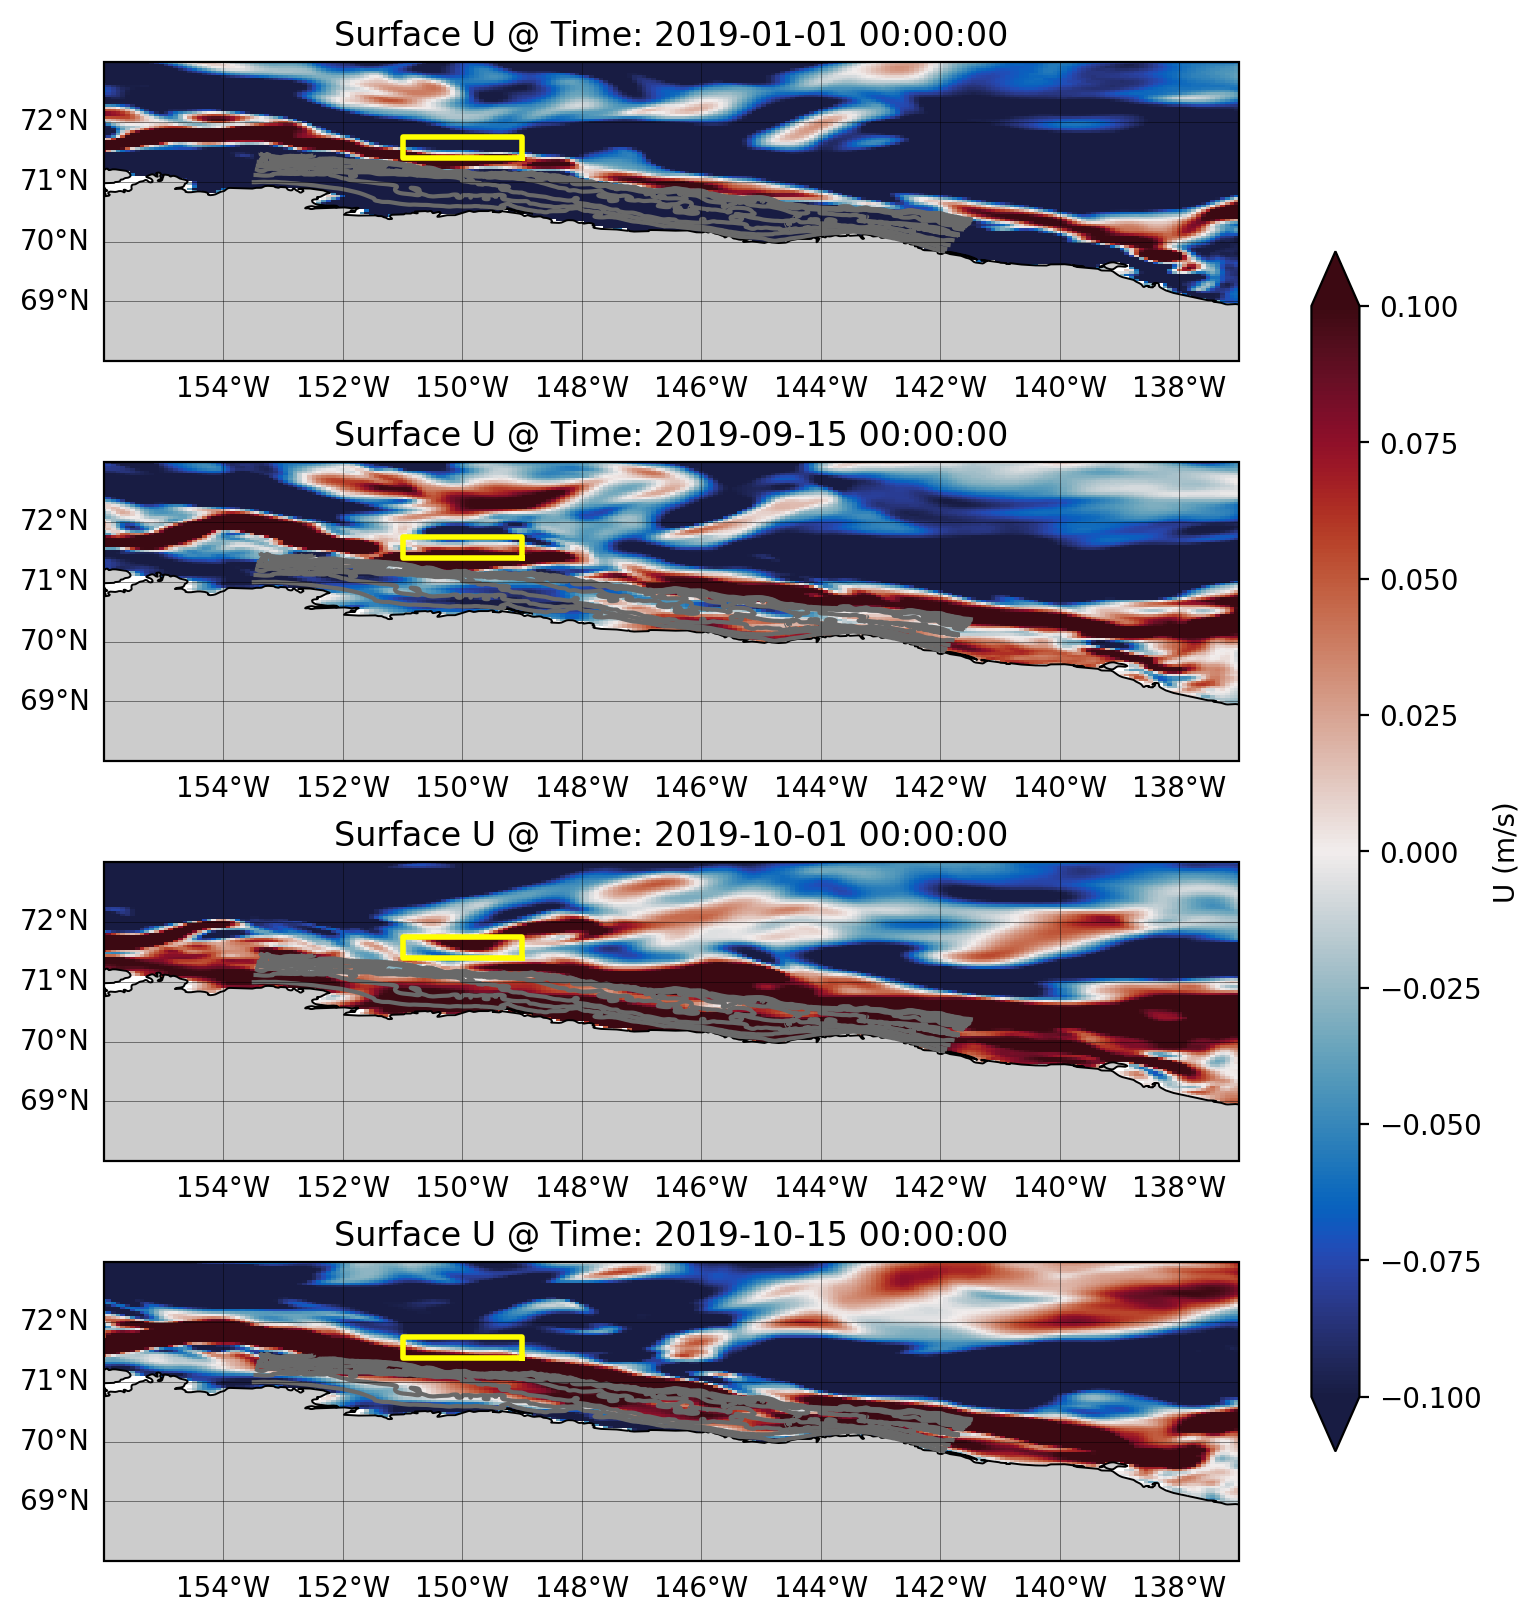

In [8]:
# Make a plot of water u to look at the jet

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(4, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = hycom_u.water_u.sel(time='2019-09-01 00:00:00', method='nearest')[0].plot(
    x='lon', y='lat',
    ax=ax[0],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
    vmin=-0.1, vmax=0.1
)
ax[0].set_title('Surface U @ Time: ' + '2019-01-01 00:00:00')

# Plot surface u at 2019-09-15
m2 = hycom_u.water_u.sel(time='2019-09-15 00:00:00', method='nearest')[0].plot(
    x='lon', y='lat',
    ax=ax[1],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
    vmin=-0.1, vmax=0.1
)
ax[1].set_title('Surface U @ Time: ' + '2019-09-15 00:00:00')

# Plot surface u at 2019-10-01
m3 = hycom_u.water_u.sel(time='2019-10-01 00:00:00', method='nearest')[0].plot(
    x='lon', y='lat',
    ax=ax[2],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
    vmin=-0.1, vmax=0.1
)
ax[2].set_title('Surface U @ Time: ' + '2019-10-01 00:00:00')

# Plot surface u at 2019-10-15
m4 = hycom_u.water_u.sel(time='2019-10-15 00:00:00', method='nearest')[0].plot(
    x='lon', y='lat',
    ax=ax[3],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
    vmin=-0.1, vmax=0.1
)
ax[3].set_title('Surface U @ Time: ' + '2019-10-15 00:00:00')

# Make a shared colorbar 
cbar_ax1 = fig.add_axes([0.70,0.10,0.015,0.75])
fig.colorbar(m1,ax=ax,extend='both',
             label='U (m/s)',
             pad=0.03, cax=cbar_ax1)

# Add other details to each subplot
for r in range(4):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

    # Pick a region to analyze 
    # Plot a box for area volume integrating
    #lon_slice = slice(145,151) 
    #lat_slice = slice(70.75,71.25) 
    box_min_lon = -149
    box_max_lon = -151
    box_min_lat = 71.4
    box_max_lat = 71.75
    # Plot the box
    ax[r].plot([box_min_lon, box_max_lon, box_max_lon, box_min_lon, box_min_lon],
            [box_min_lat, box_min_lat, box_max_lat, box_max_lat, box_min_lat],
            color='yellow', linestyle='-', linewidth=2)


# Other method of plotting the box
# #Left
# ax.plot(hycom_salt.lon.isel(lon=lon_slice),
#         hycom_salt.lat.isel(lat=lat_slice),
#         transform=ccrs.PlateCarree(), c = 'magenta', linewidth=2)
# #Right
# ax.plot(hycom_salt.lon.isel(lon=lon_slice),
#         hycom_salt.lat.isel(lat=lat_slice),
#         transform=ccrs.PlateCarree(), c = 'magenta', linewidth=2)
# #Top
# ax.plot(hycom_salt.lon.isel(lon=lon_slice),
#         hycom_salt.lat.isel(lat=lat_slice),
#         transform=ccrs.PlateCarree(), c = 'magenta', linewidth=2)
# #Bottom
# ax.plot(hycom_salt.lon.isel(lon=lon_slice),
#         hycom_salt.lat.isel(lat=lat_slice),
#         transform=ccrs.PlateCarree(), c = 'magenta', linewidth=2)

fig.canvas.draw()

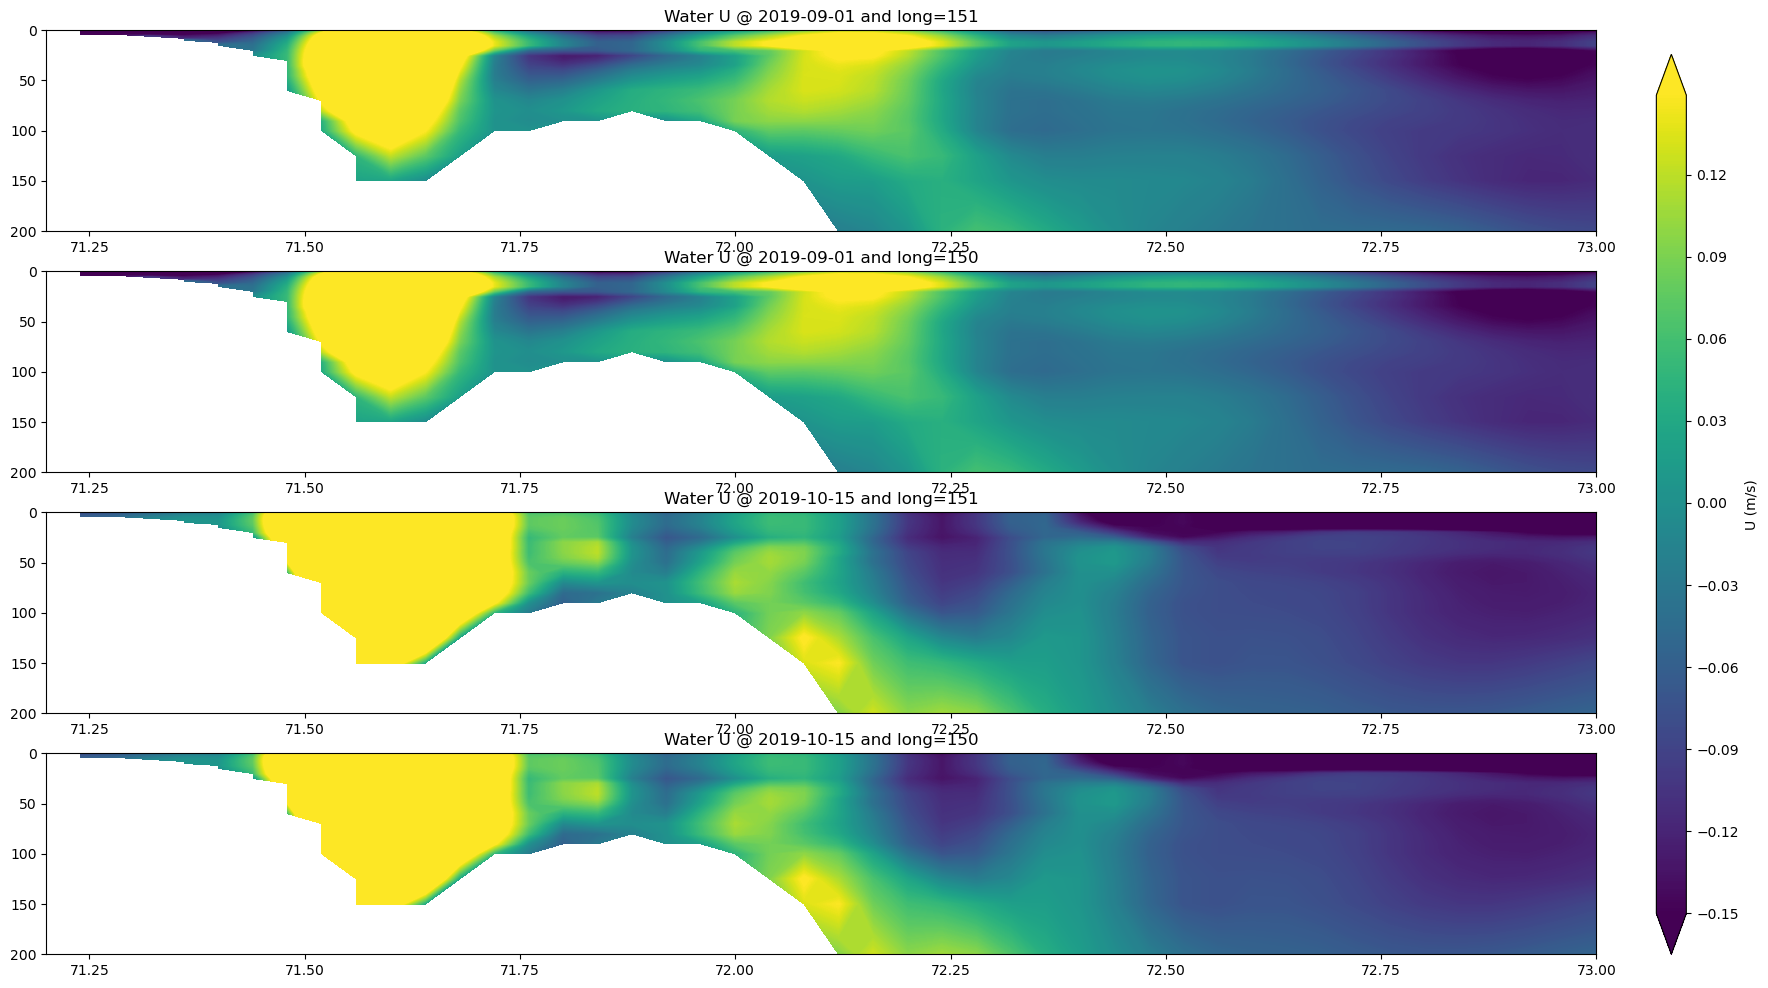

In [9]:
# Plot vertical transects of u

# Make the figure 
fig, ax = plt.subplots(4, 1, figsize=(20,12))

# Set the min, max, and levels for the colorbar
u_min = -0.15 # m/s
u_max = 0.15 # m/s
lev_u = np.arange(u_min, u_max, 0.001)

# Plot u at longitude = 151 at 2019-09-01
cs1 = ax[0].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(time='2019-09-01 00:00:00', lon=151, method='nearest')[:,80:],
                     vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
ax[0].set_title('Water U @ 2019-09-01 and long=151')

# Plot u a tlongitude 150 at 2019-09-01
cs2 = ax[1].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(time='2019-09-01 00:00:00', lon=150, method='nearest')[:,80:],
                     vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
ax[1].set_title('Water U @ 2019-09-01 and long=150')

# Plot u at longitude 151 at 2019-10-15
cs3 = ax[2].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(time='2019-10-15 00:00:00', lon=151, method='nearest')[:,80:],
                     vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
ax[2].set_title('Water U @ 2019-10-15 and long=151')

# Plot u at longitude 150 at 2019-10-15
cs4 = ax[3].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(time='2019-10-15 00:00:00', lon=150, method='nearest')[:,80:],
                     vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
ax[3].set_title('Water U @ 2019-10-15 and long=150')

# Set the y-axis range and invert the axes
for r in range(4):
    ax[r].set_ylim(0,200)
    ax[r].invert_yaxis()

# Add a shared colorbar 
cbar_ax1 = fig.add_axes([0.93,0.11,0.015,0.75])
fig.colorbar(cs1,ax=ax[0],extend='both',
             label='U (m/s)',
             pad=0.03, cax=cbar_ax1)

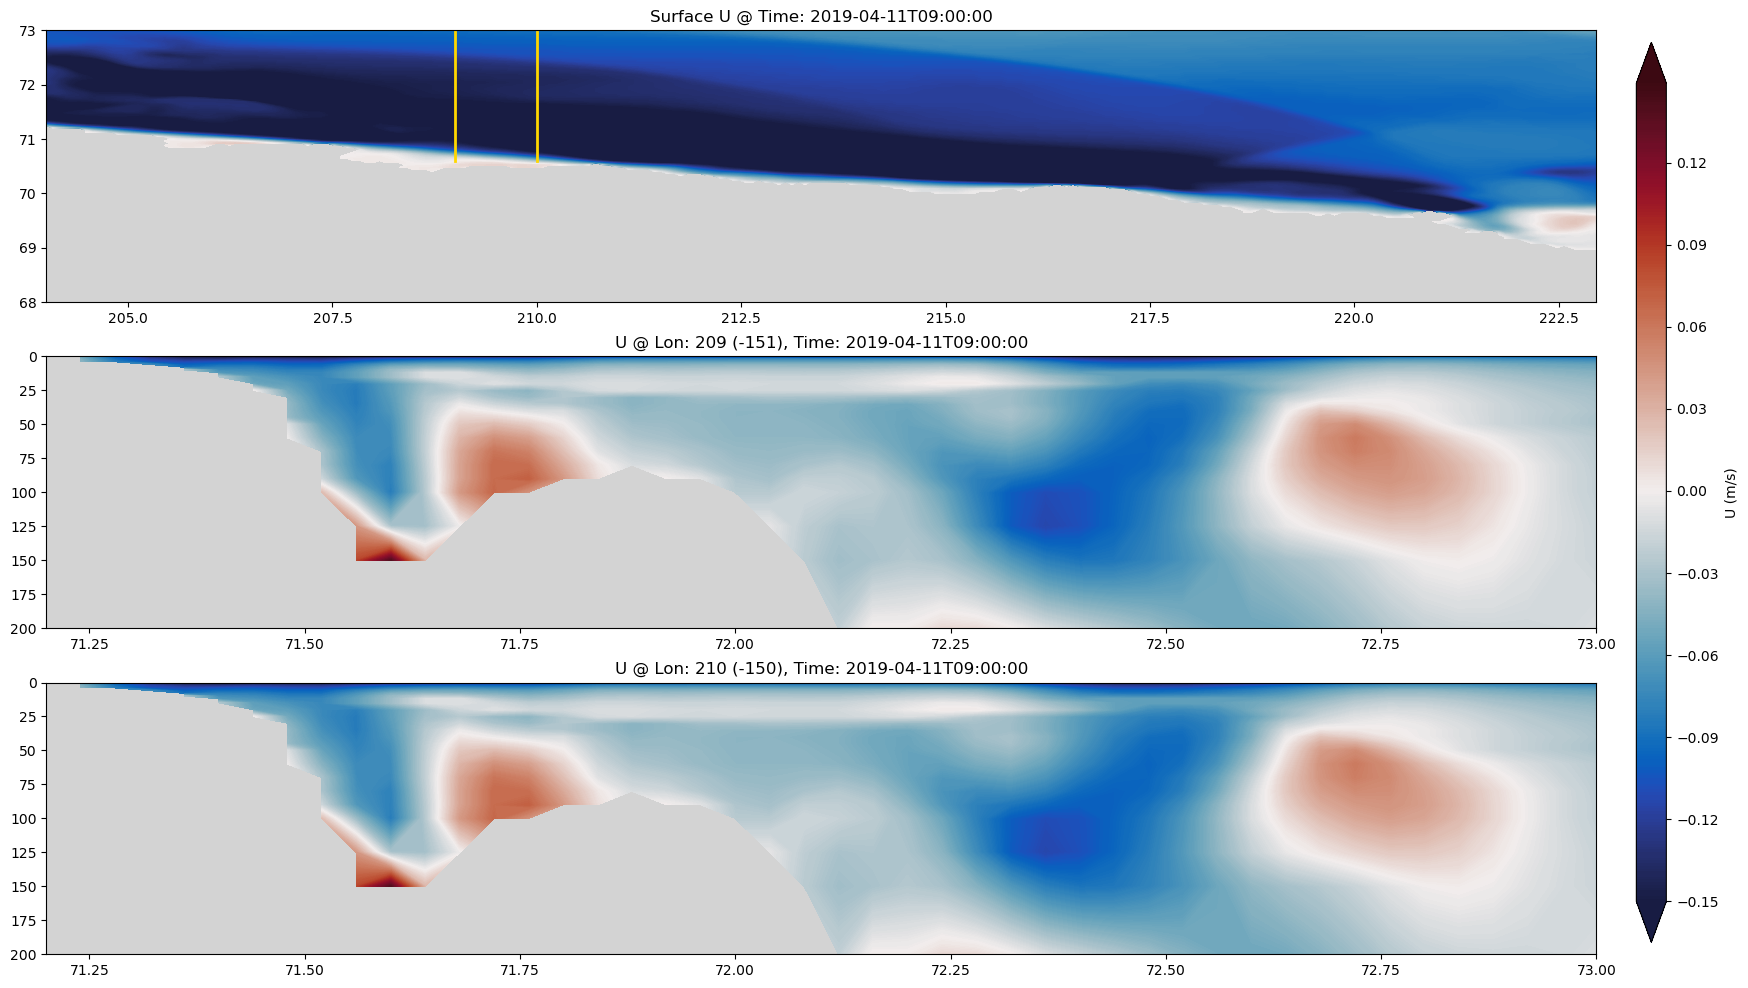

In [10]:
# Make a movie of the jet, both the surface and subplot section
# First make just an example plot, then we can loop through time to 
# get the plot for every time

# Set the time index 
time_idx1 = 100

# Set the min, max, and levels for u and bathymetry
u_min = -0.15 # m/s
u_max = 0.15 # m/s
lev_u = np.arange(u_min, u_max, 0.001)
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(3, 1, figsize=(20,12))

# Plot surface u 
cs1 = ax[0].contourf(hycom_u.lon, hycom_u.lat, hycom_u.water_u[time_idx1,0,:,:],
                   cmap=cmo.balance, projection=crs, vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
ax[0].set_title('Surface U @ Time: ' + str(hycom_u.time[time_idx1].values)[0:19])
ax[0].set_facecolor('lightgrey')
# Add lines for transects
ax[0].plot([210, 210], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)
ax[0].plot([209, 209], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)


# Plot a vertical transect at longitude 151
cs2 = ax[1].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-151, method='nearest')[time_idx1,:,80:],
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[1].set_title('U @ Lon: 209 (-151), Time: ' + str(hycom_u.time[time_idx1].values)[0:19])
ax[1].set_ylim(0,200)
ax[1].invert_yaxis()
ax[1].set_facecolor('lightgrey')

# Plot a vertical transect at longitude 150
cs2 = ax[2].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-150, method='nearest')[time_idx1,:,80:],
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[2].set_title('U @ Lon: 210 (-150), Time: ' + str(hycom_u.time[time_idx1].values)[0:19])
ax[2].set_ylim(0,200)
ax[2].invert_yaxis()
ax[2].set_facecolor('lightgrey')

# Add a shared colorbar
cbar_ax2 = fig.add_axes([0.92,0.12,0.015,0.75])
fig.colorbar(cs2,ax=ax[1],extend='both', label='U (m/s)',
             pad=0.03, cax=cbar_ax2)

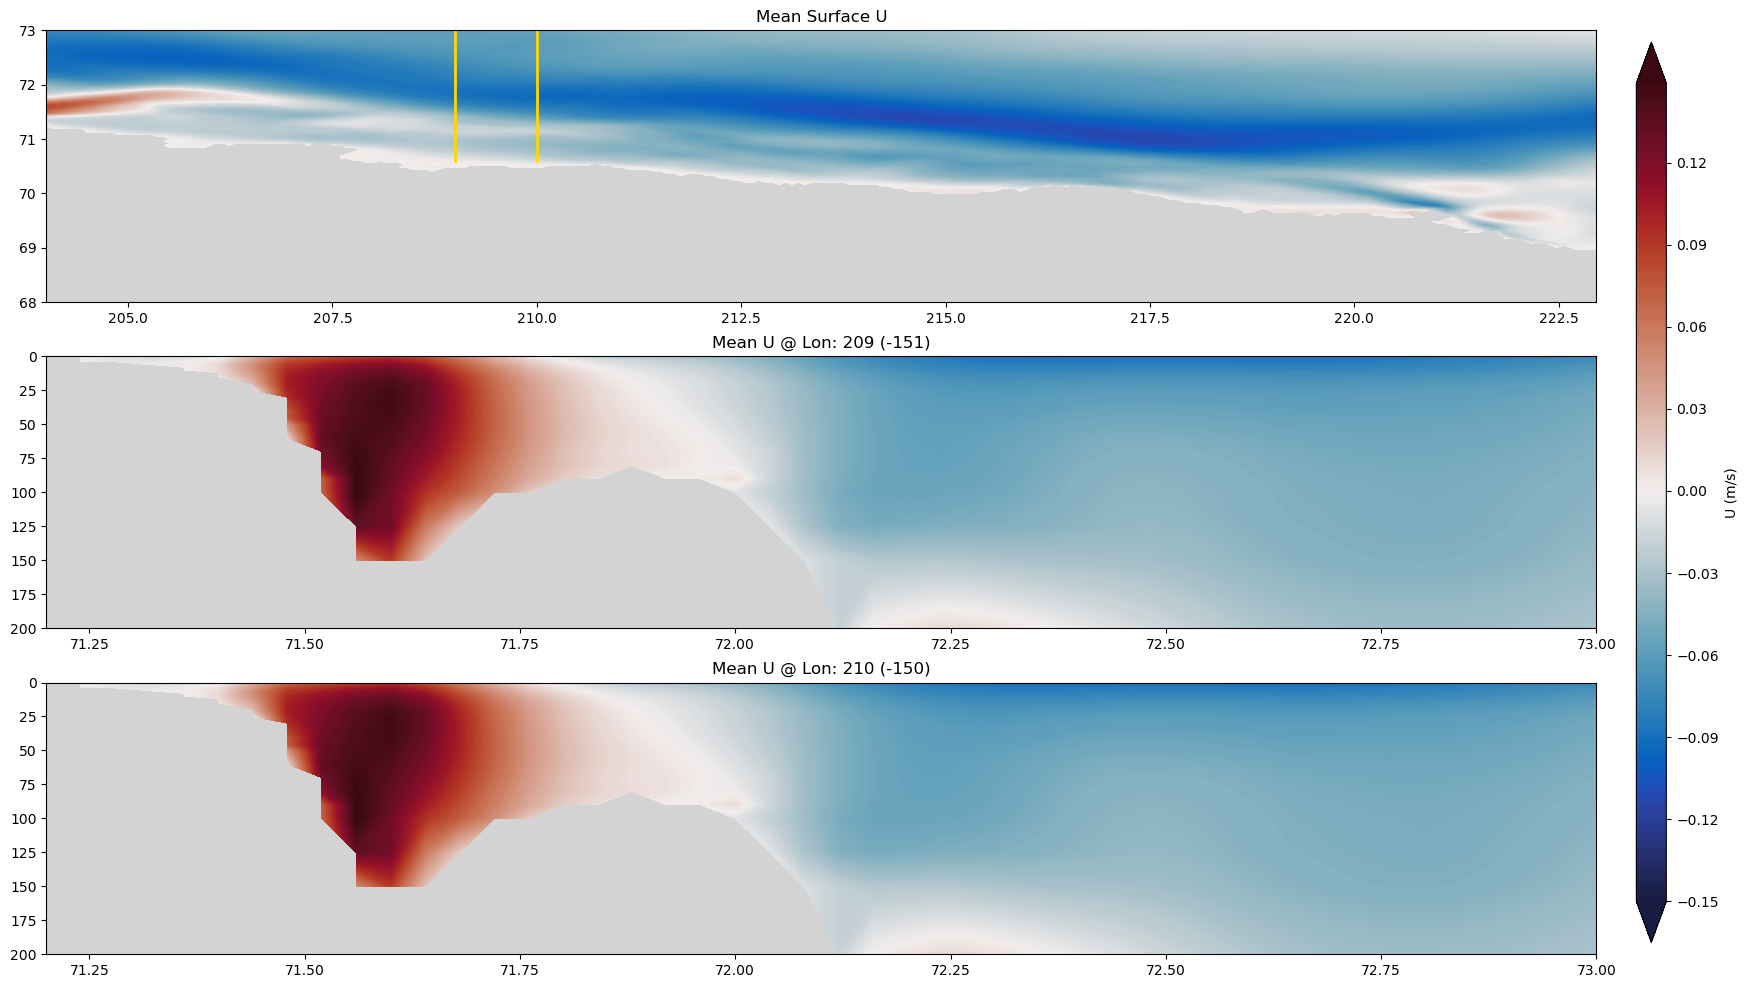

In [11]:
# Make the same plot as above but with the mean over time

# Set the min, max, and levels for u and bathymetry
u_min = -0.15 # m/s
u_max = 0.15 # m/s
lev_u = np.arange(u_min, u_max, 0.001)
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(3, 1, figsize=(20,12))

# Plot surface u 
cs1 = ax[0].contourf(hycom_u.lon, hycom_u.lat, hycom_u.water_u[:,0,:,:].mean(dim='time'),
                   cmap=cmo.balance, projection=crs, vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
ax[0].set_title('Mean Surface U')
ax[0].set_facecolor('lightgrey')
# Add lines for transects
ax[0].plot([210, 210], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)
ax[0].plot([209, 209], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)


# Plot a vertical transect at longitude 151
cs2 = ax[1].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-151, method='nearest')[:,:,80:].mean(dim='time'),
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[1].set_title('Mean U @ Lon: 209 (-151)')
ax[1].set_ylim(0,200)
ax[1].invert_yaxis()
ax[1].set_facecolor('lightgrey')

# Plot a vertical transect at longitude 150
cs2 = ax[2].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-150, method='nearest')[:,:,80:].mean(dim='time'),
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[2].set_title('Mean U @ Lon: 210 (-150)')
ax[2].set_ylim(0,200)
ax[2].invert_yaxis()
ax[2].set_facecolor('lightgrey')

# Add a shared colorbar
cbar_ax2 = fig.add_axes([0.92,0.12,0.015,0.75])
fig.colorbar(cs2,ax=ax[1],extend='both', label='U (m/s)',
             pad=0.03, cax=cbar_ax2)

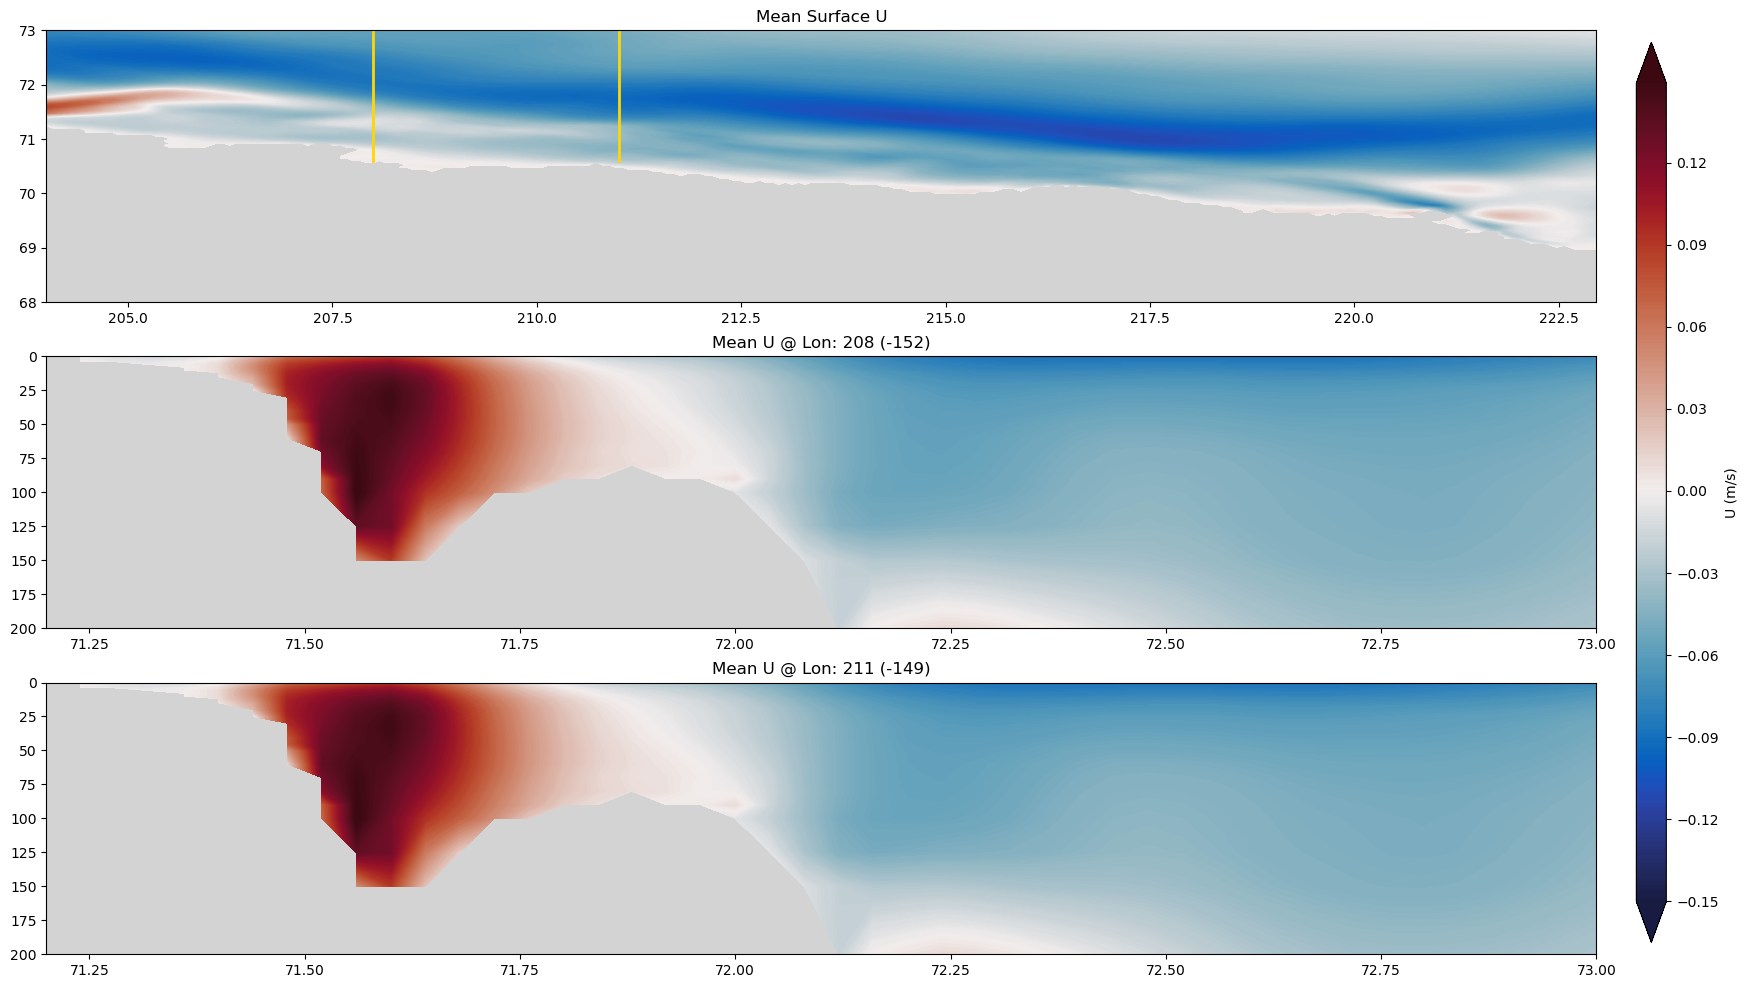

In [12]:
# Plot the mean for another location with the means over time 

# Set the min, max, and levels for u and bathymetry
u_min = -0.15 # m/s
u_max = 0.15 # m/s
lev_u = np.arange(u_min, u_max, 0.001)
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(3, 1, figsize=(20,12))

# Plot surface u 
cs1 = ax[0].contourf(hycom_u.lon, hycom_u.lat, hycom_u.water_u[:,0,:,:].mean(dim='time'),
                   cmap=cmo.balance, projection=crs, vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
ax[0].set_title('Mean Surface U')
ax[0].set_facecolor('lightgrey')
# Add lines for transects
ax[0].plot([211, 211], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)
ax[0].plot([208, 208], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)


# Plot a vertical transect at longitude 151
cs2 = ax[1].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-152, method='nearest')[:,:,80:].mean(dim='time'),
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[1].set_title('Mean U @ Lon: 208 (-152)')
ax[1].set_ylim(0,200)
ax[1].invert_yaxis()
ax[1].set_facecolor('lightgrey')

# Plot a vertical transect at longitude 150
cs2 = ax[2].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-149, method='nearest')[:,:,80:].mean(dim='time'),
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[2].set_title('Mean U @ Lon: 211 (-149)')
ax[2].set_ylim(0,200)
ax[2].invert_yaxis()
ax[2].set_facecolor('lightgrey')

# Add a shared colorbar
cbar_ax2 = fig.add_axes([0.92,0.12,0.015,0.75])
fig.colorbar(cs2,ax=ax[1],extend='both', label='U (m/s)',
             pad=0.03, cax=cbar_ax2)

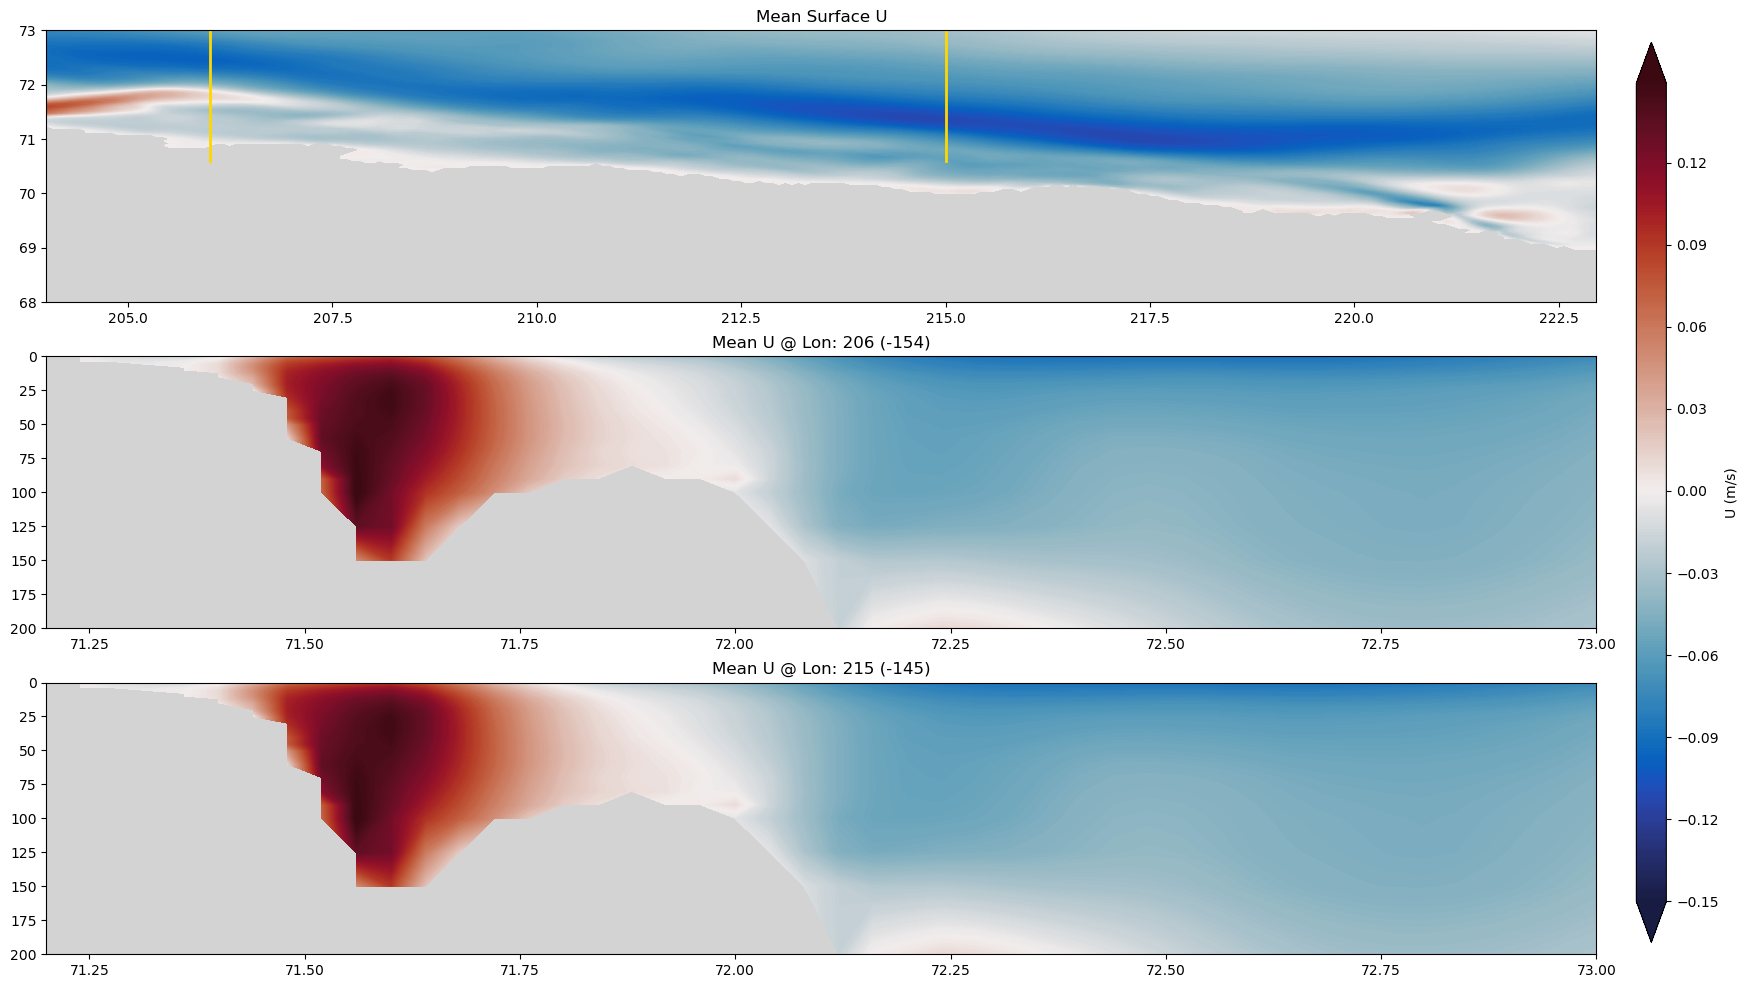

In [13]:
# Plot the mean for another location with the means over time 

# Set the min, max, and levels for u and bathymetry
u_min = -0.15 # m/s
u_max = 0.15 # m/s
lev_u = np.arange(u_min, u_max, 0.001)
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(3, 1, figsize=(20,12))

# Plot surface u 
cs1 = ax[0].contourf(hycom_u.lon, hycom_u.lat, hycom_u.water_u[:,0,:,:].mean(dim='time'),
                   cmap=cmo.balance, projection=crs, vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
ax[0].set_title('Mean Surface U')
ax[0].set_facecolor('lightgrey')
# Add lines for transects
ax[0].plot([206, 206], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)
ax[0].plot([215, 215], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)


# Plot a vertical transect at longitude 151
cs2 = ax[1].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-154, method='nearest')[:,:,80:].mean(dim='time'),
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[1].set_title('Mean U @ Lon: 206 (-154)')
ax[1].set_ylim(0,200)
ax[1].invert_yaxis()
ax[1].set_facecolor('lightgrey')

# Plot a vertical transect at longitude 150
cs2 = ax[2].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-145, method='nearest')[:,:,80:].mean(dim='time'),
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[2].set_title('Mean U @ Lon: 215 (-145)')
ax[2].set_ylim(0,200)
ax[2].invert_yaxis()
ax[2].set_facecolor('lightgrey')

# Add a shared colorbar
cbar_ax2 = fig.add_axes([0.92,0.12,0.015,0.75])
fig.colorbar(cs2,ax=ax[1],extend='both', label='U (m/s)',
             pad=0.03, cax=cbar_ax2)

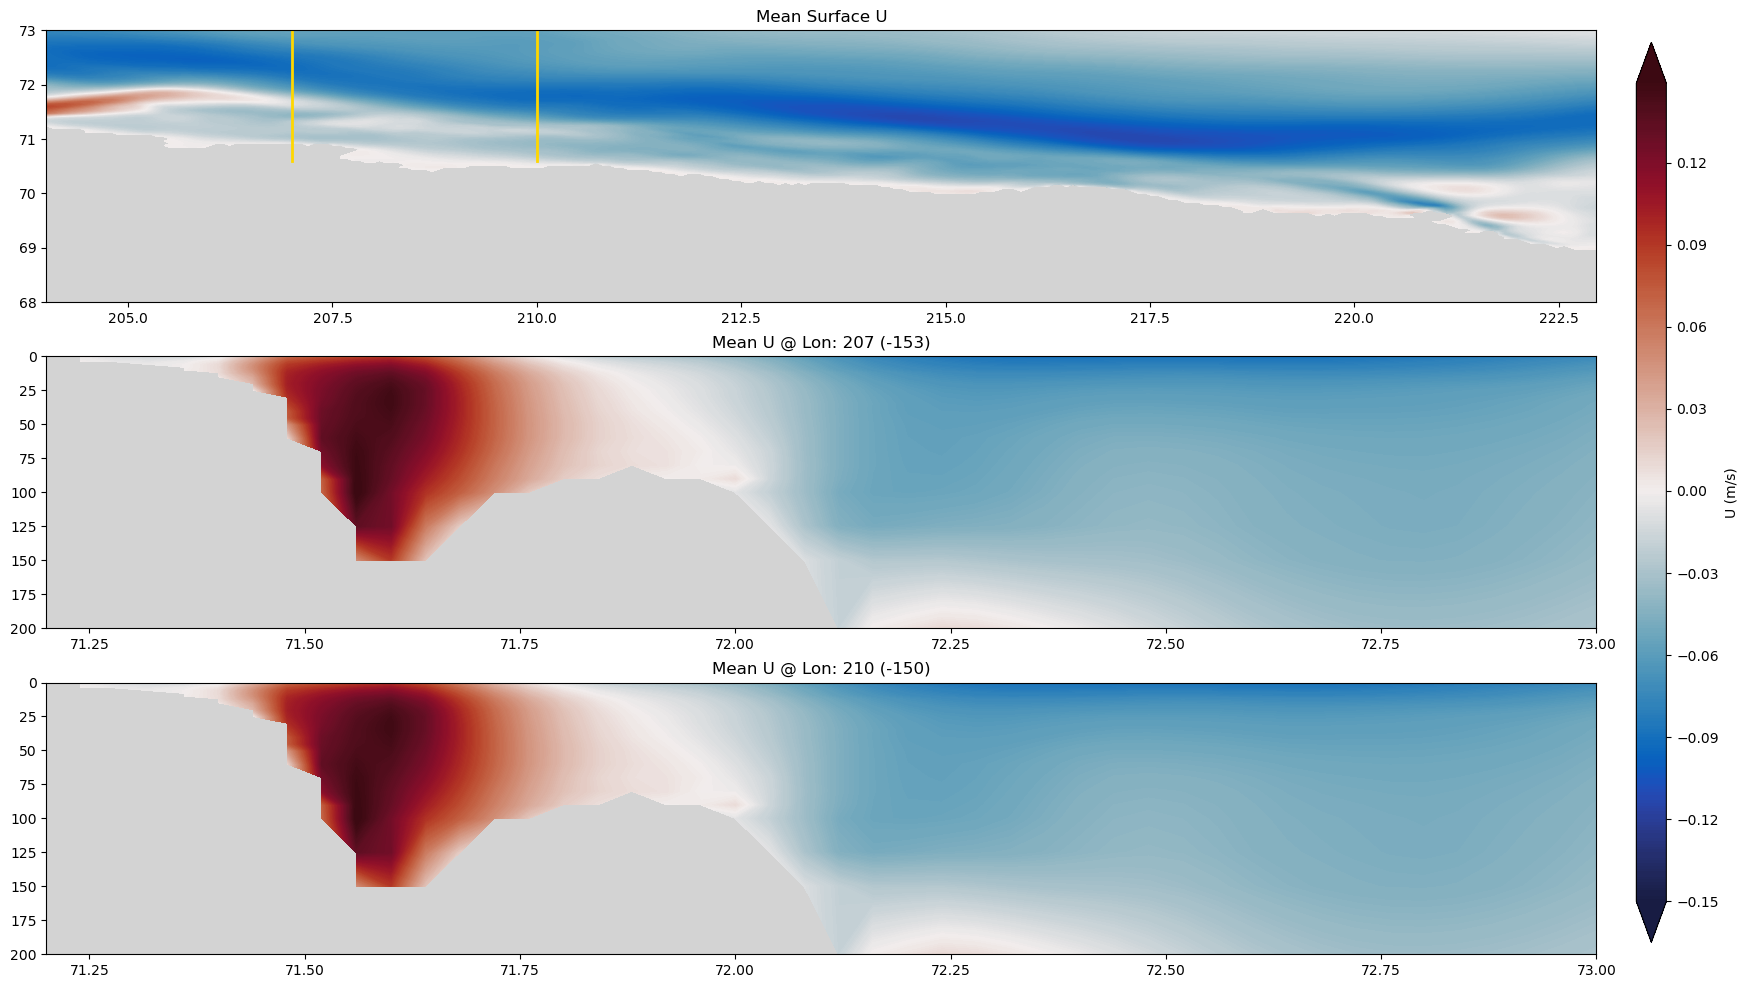

In [14]:
# Plot the mean for another location with the means over time 

# Set the min, max, and levels for u and bathymetry
u_min = -0.15 # m/s
u_max = 0.15 # m/s
lev_u = np.arange(u_min, u_max, 0.001)
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(3, 1, figsize=(20,12))

# Plot surface u 
cs1 = ax[0].contourf(hycom_u.lon, hycom_u.lat, hycom_u.water_u[:,0,:,:].mean(dim='time'),
                   cmap=cmo.balance, projection=crs, vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
ax[0].set_title('Mean Surface U')
ax[0].set_facecolor('lightgrey')
# Add lines for transects
ax[0].plot([207, 207], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)
ax[0].plot([210, 210], 
           [hycom_u.lat[65], hycom_u.lat.max()],
           color='gold', linewidth=2)


# Plot a vertical transect at longitude 151
cs2 = ax[1].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-153, method='nearest')[:,:,80:].mean(dim='time'),
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[1].set_title('Mean U @ Lon: 207 (-153)')
ax[1].set_ylim(0,200)
ax[1].invert_yaxis()
ax[1].set_facecolor('lightgrey')

# Plot a vertical transect at longitude 150
cs2 = ax[2].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-150, method='nearest')[:,:,80:].mean(dim='time'),
                     vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
ax[2].set_title('Mean U @ Lon: 210 (-150)')
ax[2].set_ylim(0,200)
ax[2].invert_yaxis()
ax[2].set_facecolor('lightgrey')

# Add a shared colorbar
cbar_ax2 = fig.add_axes([0.92,0.12,0.015,0.75])
fig.colorbar(cs2,ax=ax[1],extend='both', label='U (m/s)',
             pad=0.03, cax=cbar_ax2)

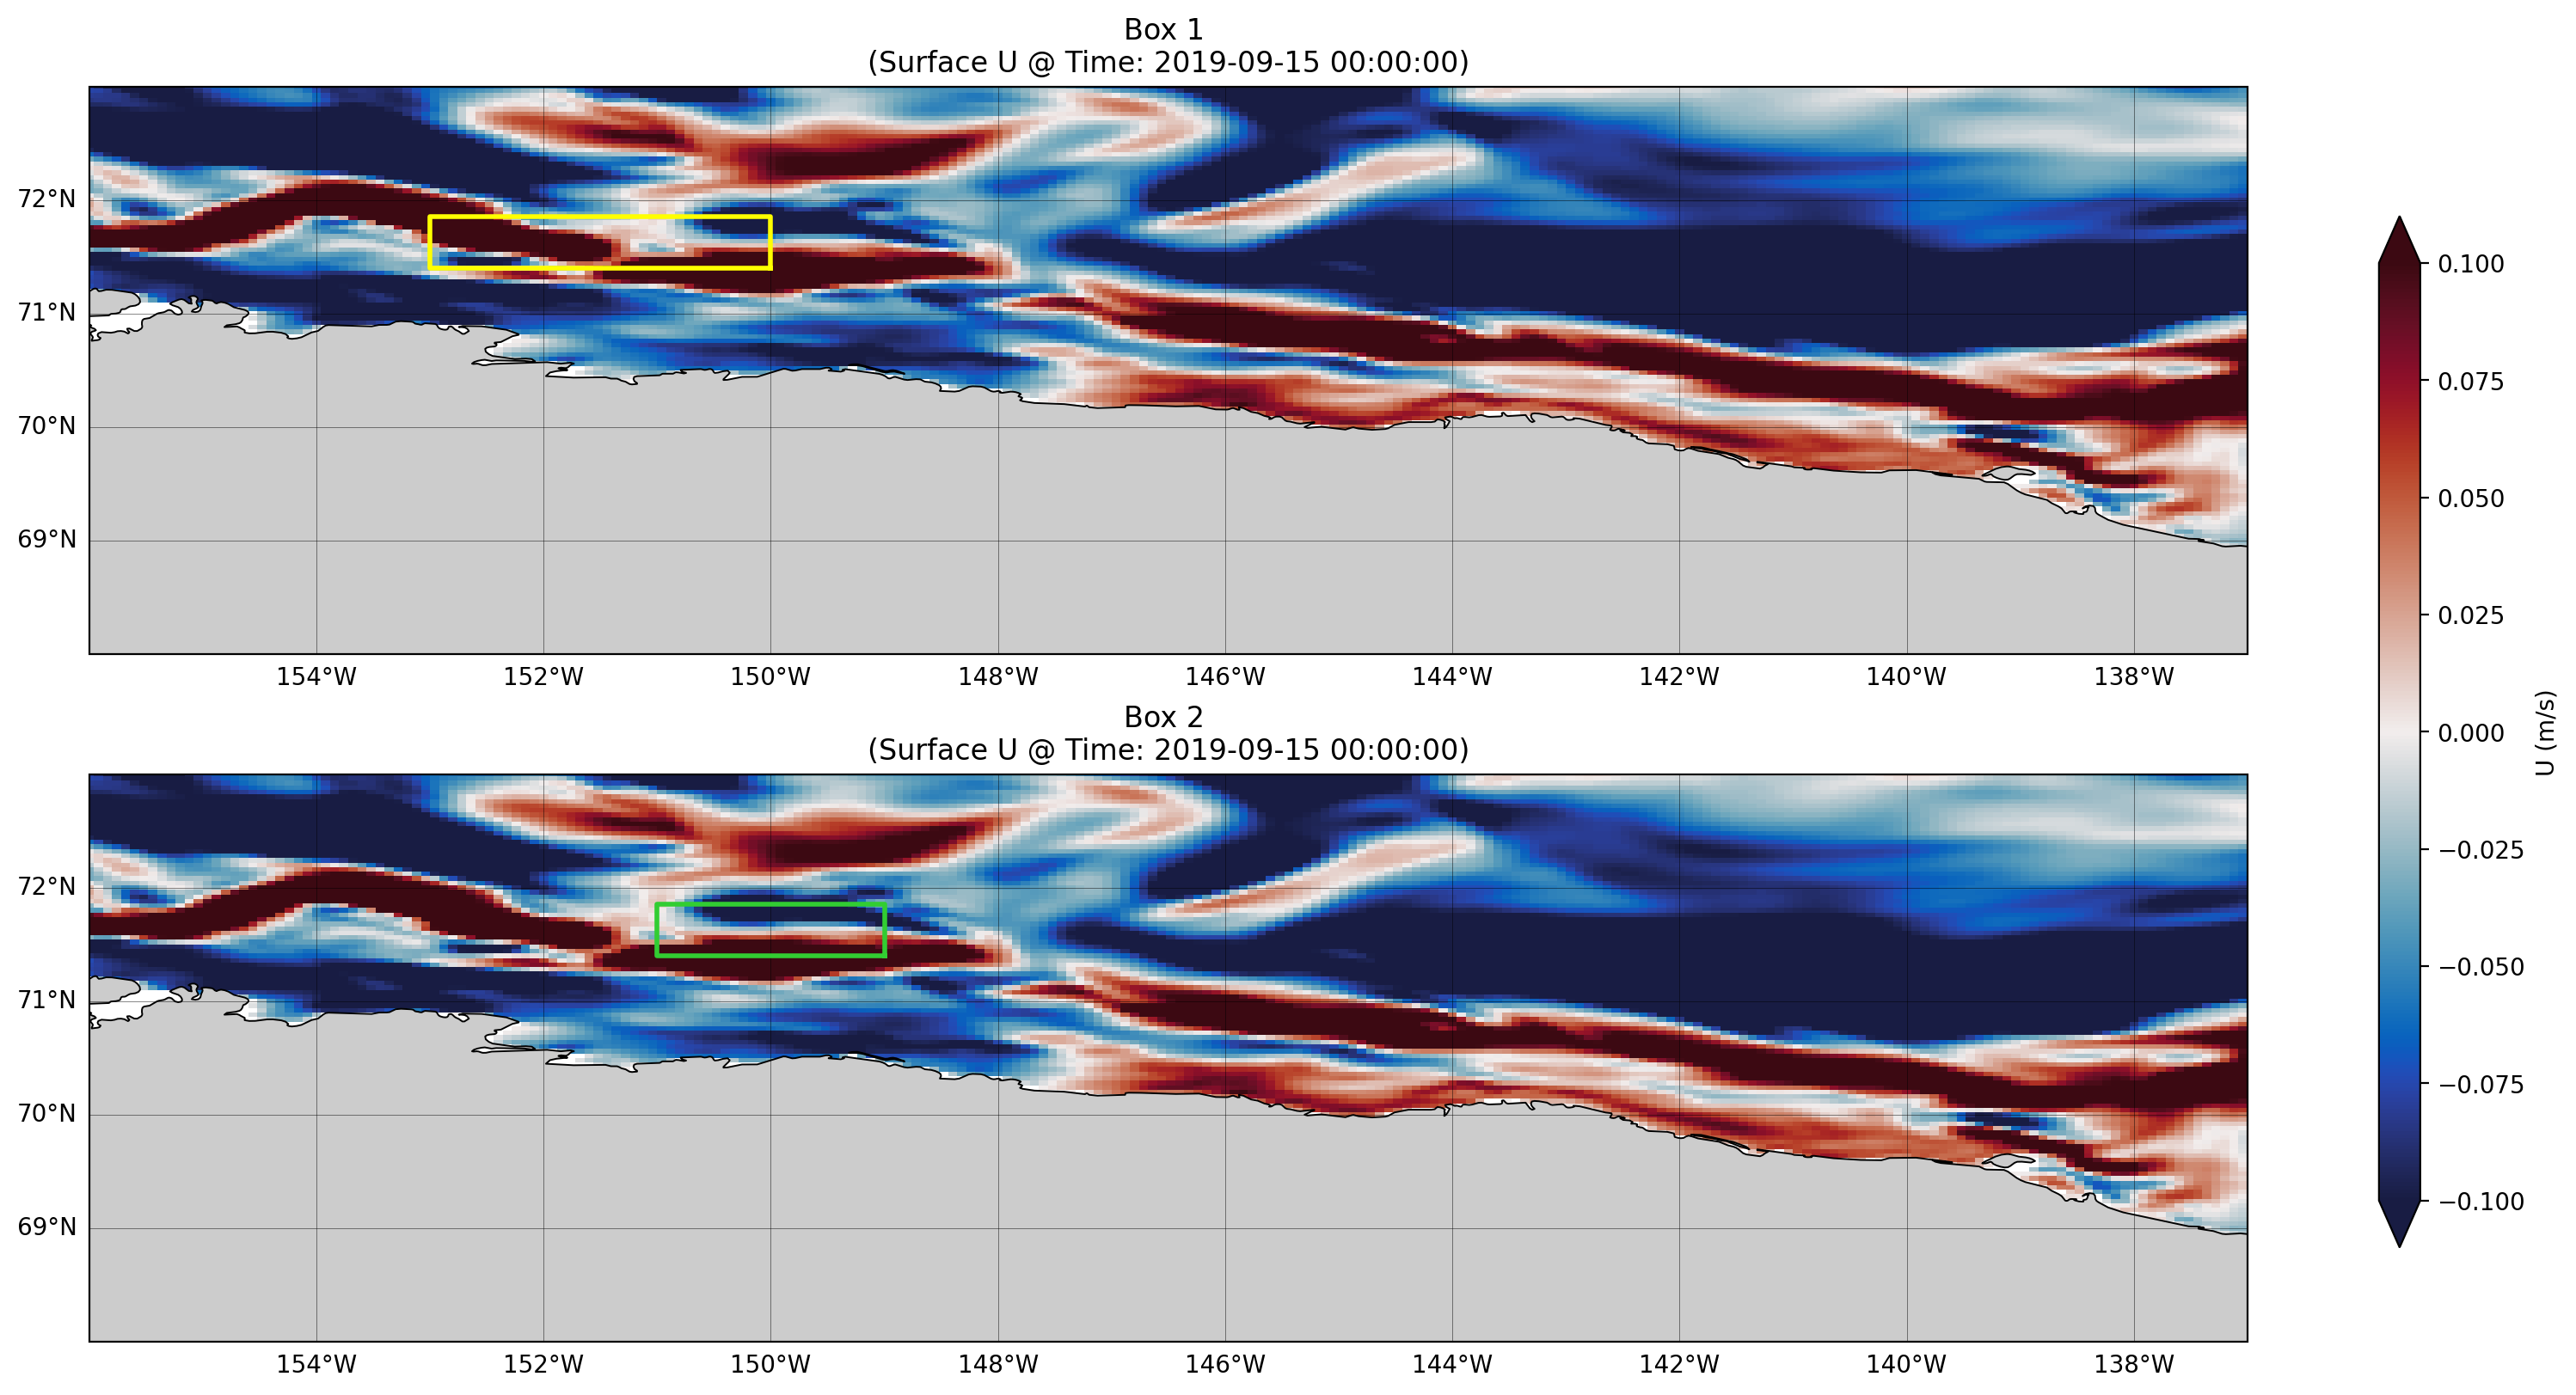

In [15]:
# Make two boxes to get stats on that are both on the jet 

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = hycom_u.water_u.sel(time='2019-09-15 00:00:00', method='nearest')[0].plot(
    x='lon', y='lat',
    ax=ax[0],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
    vmin=-0.1, vmax=0.1
)
ax[0].set_title('Box 1 \n(Surface U @ Time: ' + '2019-09-15 00:00:00)')

# Plot surface u at 2019-09-15
m2 = hycom_u.water_u.sel(time='2019-09-15 00:00:00', method='nearest')[0].plot(
    x='lon', y='lat',
    ax=ax[1],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
    vmin=-0.1, vmax=0.1
)
ax[1].set_title('Box 2 \n(Surface U @ Time: ' + '2019-09-15 00:00:00)')


# Make a shared colorbar 
cbar_ax1 = fig.add_axes([0.94,0.10,0.015,0.75])
fig.colorbar(m1,ax=ax,extend='both',
             label='U (m/s)',
             pad=0.03, cax=cbar_ax1)

# Add other details to each subplot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

# Pick a region to analyze 
# Box 1
box_min_lon_01 = -150
box_max_lon_01 = -153
box_min_lat_01 = 71.4
box_max_lat_01 = 71.85
# Plot Box 1
ax[0].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)

# Box 2
box_min_lon_02 = -149
box_max_lon_02 = -151
box_min_lat_02 = 71.4
box_max_lat_02 = 71.85
# Plot Box 1
ax[1].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)



fig.canvas.draw()

In [16]:
# Make a movie of the above plot so we can see the jet over time

# Import the needed packages
from joblib import Parallel, delayed

# Define a function to plot each frame for a given time
def plot_frame(t):

    # Set some ranges
    u_min = -0.15 # m/s
    u_max = 0.15 # m/s
    lev_u = np.arange(u_min, u_max, 0.001)
    lev_bathy = np.arange(10,110,10)

    # Make the figure
    fig, ax = plt.subplots(3, 1, figsize=(20,12))

    # Plot surface u
    cs1 = ax[0].contourf(hycom_u.lon, hycom_u.lat, hycom_u.water_u[t,0,:,:],
                    cmap=cmo.balance, projection=crs, vmin=u_min, vmax=u_max, levels=lev_u, extend='both')
    ax[0].set_title('Surface U @ Time: ' + str(hycom_u.time[t].values)[0:19])
    ax[0].set_facecolor('lightgrey')
    # Add lines for transects
    ax[0].plot([210, 210], 
            [hycom_u.lat[65], hycom_u.lat.max()],
            color='gold', linewidth=2)
    ax[0].plot([209, 209], 
            [hycom_u.lat[65], hycom_u.lat.max()],
            color='gold', linewidth=2)


    # Plot a vertical transect at longitude 151
    cs2 = ax[1].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-151, method='nearest')[t,:,80:],
                        vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
    ax[1].set_title('U @ Lon: 209 (-151), Time: ' + str(hycom_u.time[t].values)[0:19])
    ax[1].set_ylim(0,200)
    ax[1].invert_yaxis()
    ax[1].set_facecolor('lightgrey')

    # Plot a vertical transect at longitude 150
    cs2 = ax[2].contourf(hycom_u.lat[80:], hycom_u.depth, hycom_u.water_u.sel(lon=-150, method='nearest')[t,:,80:],
                        vmin=u_min, vmax=u_max, levels=lev_u, cmap=cmo.balance, extend='both')
    ax[2].set_title('U @ Lon: 210 (-150), Time: ' + str(hycom_u.time[t].values)[0:19])
    ax[2].set_ylim(0,200)
    ax[2].invert_yaxis()
    ax[2].set_facecolor('lightgrey')

    # Add a shared colorbar 
    cbar_ax2 = fig.add_axes([0.92,0.12,0.015,0.75])
    fig.colorbar(cs2,ax=ax[1],extend='both', label='U (m/s)',
                pad=0.03, cax=cbar_ax2)

    # Save the figure
    plt.savefig(
        #f'/pscratch/sd/b/bundzis/Beaufort_ROMS_2020_nosed_dvd_myroms_scratch/Movies/Rel_vort_surf_salt_temp_mnum/Attempt004/surf_zetaf_salt_temp_mnum_mpdata_kelvin_{i}.png',
        f'/pscratch/sd/b/bundzis/Beaufort_ROMS_idealized_jet_scratch/Movies/Jet/Plots01/surf_depth_u_jet_{t}.png',
        dpi=200, bbox_inches='tight'
    )
    plt.close(fig)  # Close to avoid memory leaks

In [17]:
# Run n_jobs plots in parallel at once (adjust n_jobs based on your CPU)
# Uncomment below to run to make the movie/plots for the movie 
#Parallel(n_jobs=4)(delayed(plot_frame)(t) for t in range(0, len(hycom_u.time), 1))

#### Calculate $M^{2}$ & $N^{2}$
Notes from Dylan: 
- $M^{2}$
    - Calculate only for top vertical level, restrict northern boundary to slope break (northern edge of jet)
- $N^{2}$
    - Calculate in same lateral area as $M^{2}$ but restrict to pycnocline depth

In [18]:
# Set the region that we will do calculations on (assume some region for now, 
# then can change it later to be more specific)
# This box is set in the above plot to prevent being set in multiple
# spots so will need to change it up there to change it down here

# We will now look at two boxes as options bassed on jet things 
# (copied here for reference but set up above in the plot)
# -- Box 1 --
# box_min_lon_01 = -150
# box_max_lon_01 = -153
# box_min_lat_01 = 71.4
# box_max_lat_01 = 71.75
# -- Box 2 --
# box_min_lon_02 = -149
# box_max_lon_02 = -151
# box_min_lat_02 = 71.4
# box_max_lat_02 = 71.75

# Convert to 360 bassed lat/lon
# Box 1
box_min_lon_01_360 = box_max_lon_01 + 360 
box_max_lon_01_360 = box_min_lon_01 + 360 
# Box 2
box_min_lon_02_360 = box_max_lon_02 + 360 
box_max_lon_02_360 = box_min_lon_02 + 360 


print('Box 1 Bounds:')
print('min_lon: ', str(box_min_lon_01) + ' (W) or ' + str(box_min_lon_01_360) + ' (0 - 360)')
print('max_lon: ', str(box_max_lon_01) + ' (W) or ' + str(box_max_lon_01_360) + ' (0 - 360)')
print('min_lat: ', box_min_lat_01)
print('max_lat: ', box_max_lat_01)
print('Box 2 Bounds:')
print('min_lon: ', str(box_min_lon_02) + ' (W) or ' + str(box_min_lon_02_360) + ' (0 - 360)')
print('max_lon: ', str(box_max_lon_02) + ' (W) or ' + str(box_max_lon_02_360) + ' (0 - 360)')
print('min_lat: ', box_min_lat_02)
print('max_lat: ', box_max_lat_02)

# Trim the salt and temp data to this region
# Box 1
salt_reg1 = hycom_salt.salinity.sel(lon=slice(box_min_lon_01_360, box_max_lon_01_360), lat=slice(box_min_lat_01, box_max_lat_01))
temp_reg1 = hycom_temp.water_temp.sel(lon=slice(box_min_lon_01_360, box_max_lon_01_360), lat=slice(box_min_lat_01, box_max_lat_01))
# Box 2
salt_reg2 = hycom_salt.salinity.sel(lon=slice(box_min_lon_02_360, box_max_lon_02_360), lat=slice(box_min_lat_02, box_max_lat_02))
temp_reg2 = hycom_temp.water_temp.sel(lon=slice(box_min_lon_02_360, box_max_lon_02_360), lat=slice(box_min_lat_02, box_max_lat_02))

Box 1 Bounds:
min_lon:  -150 (W) or 207 (0 - 360)
max_lon:  -153 (W) or 210 (0 - 360)
min_lat:  71.4
max_lat:  71.85
Box 2 Bounds:
min_lon:  -149 (W) or 209 (0 - 360)
max_lon:  -151 (W) or 211 (0 - 360)
min_lat:  71.4
max_lat:  71.85


In [19]:
print(salt_reg1)
print(temp_reg1)

<xarray.DataArray 'salinity' (time: 2075, depth: 40, lat: 12, lon: 38)> Size: 303MB
[37848000 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 304B 207.0 207.1 207.2 207.3 ... 209.8 209.9 210.0
  * lat      (lat) float64 96B 71.4 71.44 71.48 71.52 ... 71.72 71.76 71.8 71.84
  * depth    (depth) float64 320B 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * time     (time) datetime64[ns] 17kB 2019-01-01T09:00:00 ... 2024-09-05T09...
Attributes:
    standard_name:    sea_water_salinity
    long_name:        Salinity
    units:            psu
    _CoordinateAxes:  time depth lat lon 
    NAVO_code:        16
<xarray.DataArray 'water_temp' (time: 2075, depth: 40, lat: 12, lon: 38)> Size: 303MB
[37848000 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 304B 207.0 207.1 207.2 207.3 ... 209.8 209.9 210.0
  * lat      (lat) float64 96B 71.4 71.44 71.48 71.52 ... 71.72 71.76 71.8 71.84
  * depth    (depth) float64 320B 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 

In [20]:
print(salt_reg2)
print(temp_reg2)

<xarray.DataArray 'salinity' (time: 2075, depth: 40, lat: 12, lon: 25)> Size: 199MB
[24900000 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 200B 209.0 209.1 209.2 209.3 ... 210.8 210.9 211.0
  * lat      (lat) float64 96B 71.4 71.44 71.48 71.52 ... 71.72 71.76 71.8 71.84
  * depth    (depth) float64 320B 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * time     (time) datetime64[ns] 17kB 2019-01-01T09:00:00 ... 2024-09-05T09...
Attributes:
    standard_name:    sea_water_salinity
    long_name:        Salinity
    units:            psu
    _CoordinateAxes:  time depth lat lon 
    NAVO_code:        16
<xarray.DataArray 'water_temp' (time: 2075, depth: 40, lat: 12, lon: 25)> Size: 199MB
[24900000 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 200B 209.0 209.1 209.2 209.3 ... 210.8 210.9 211.0
  * lat      (lat) float64 96B 71.4 71.44 71.48 71.52 ... 71.72 71.76 71.8 71.84
  * depth    (depth) float64 320B 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 

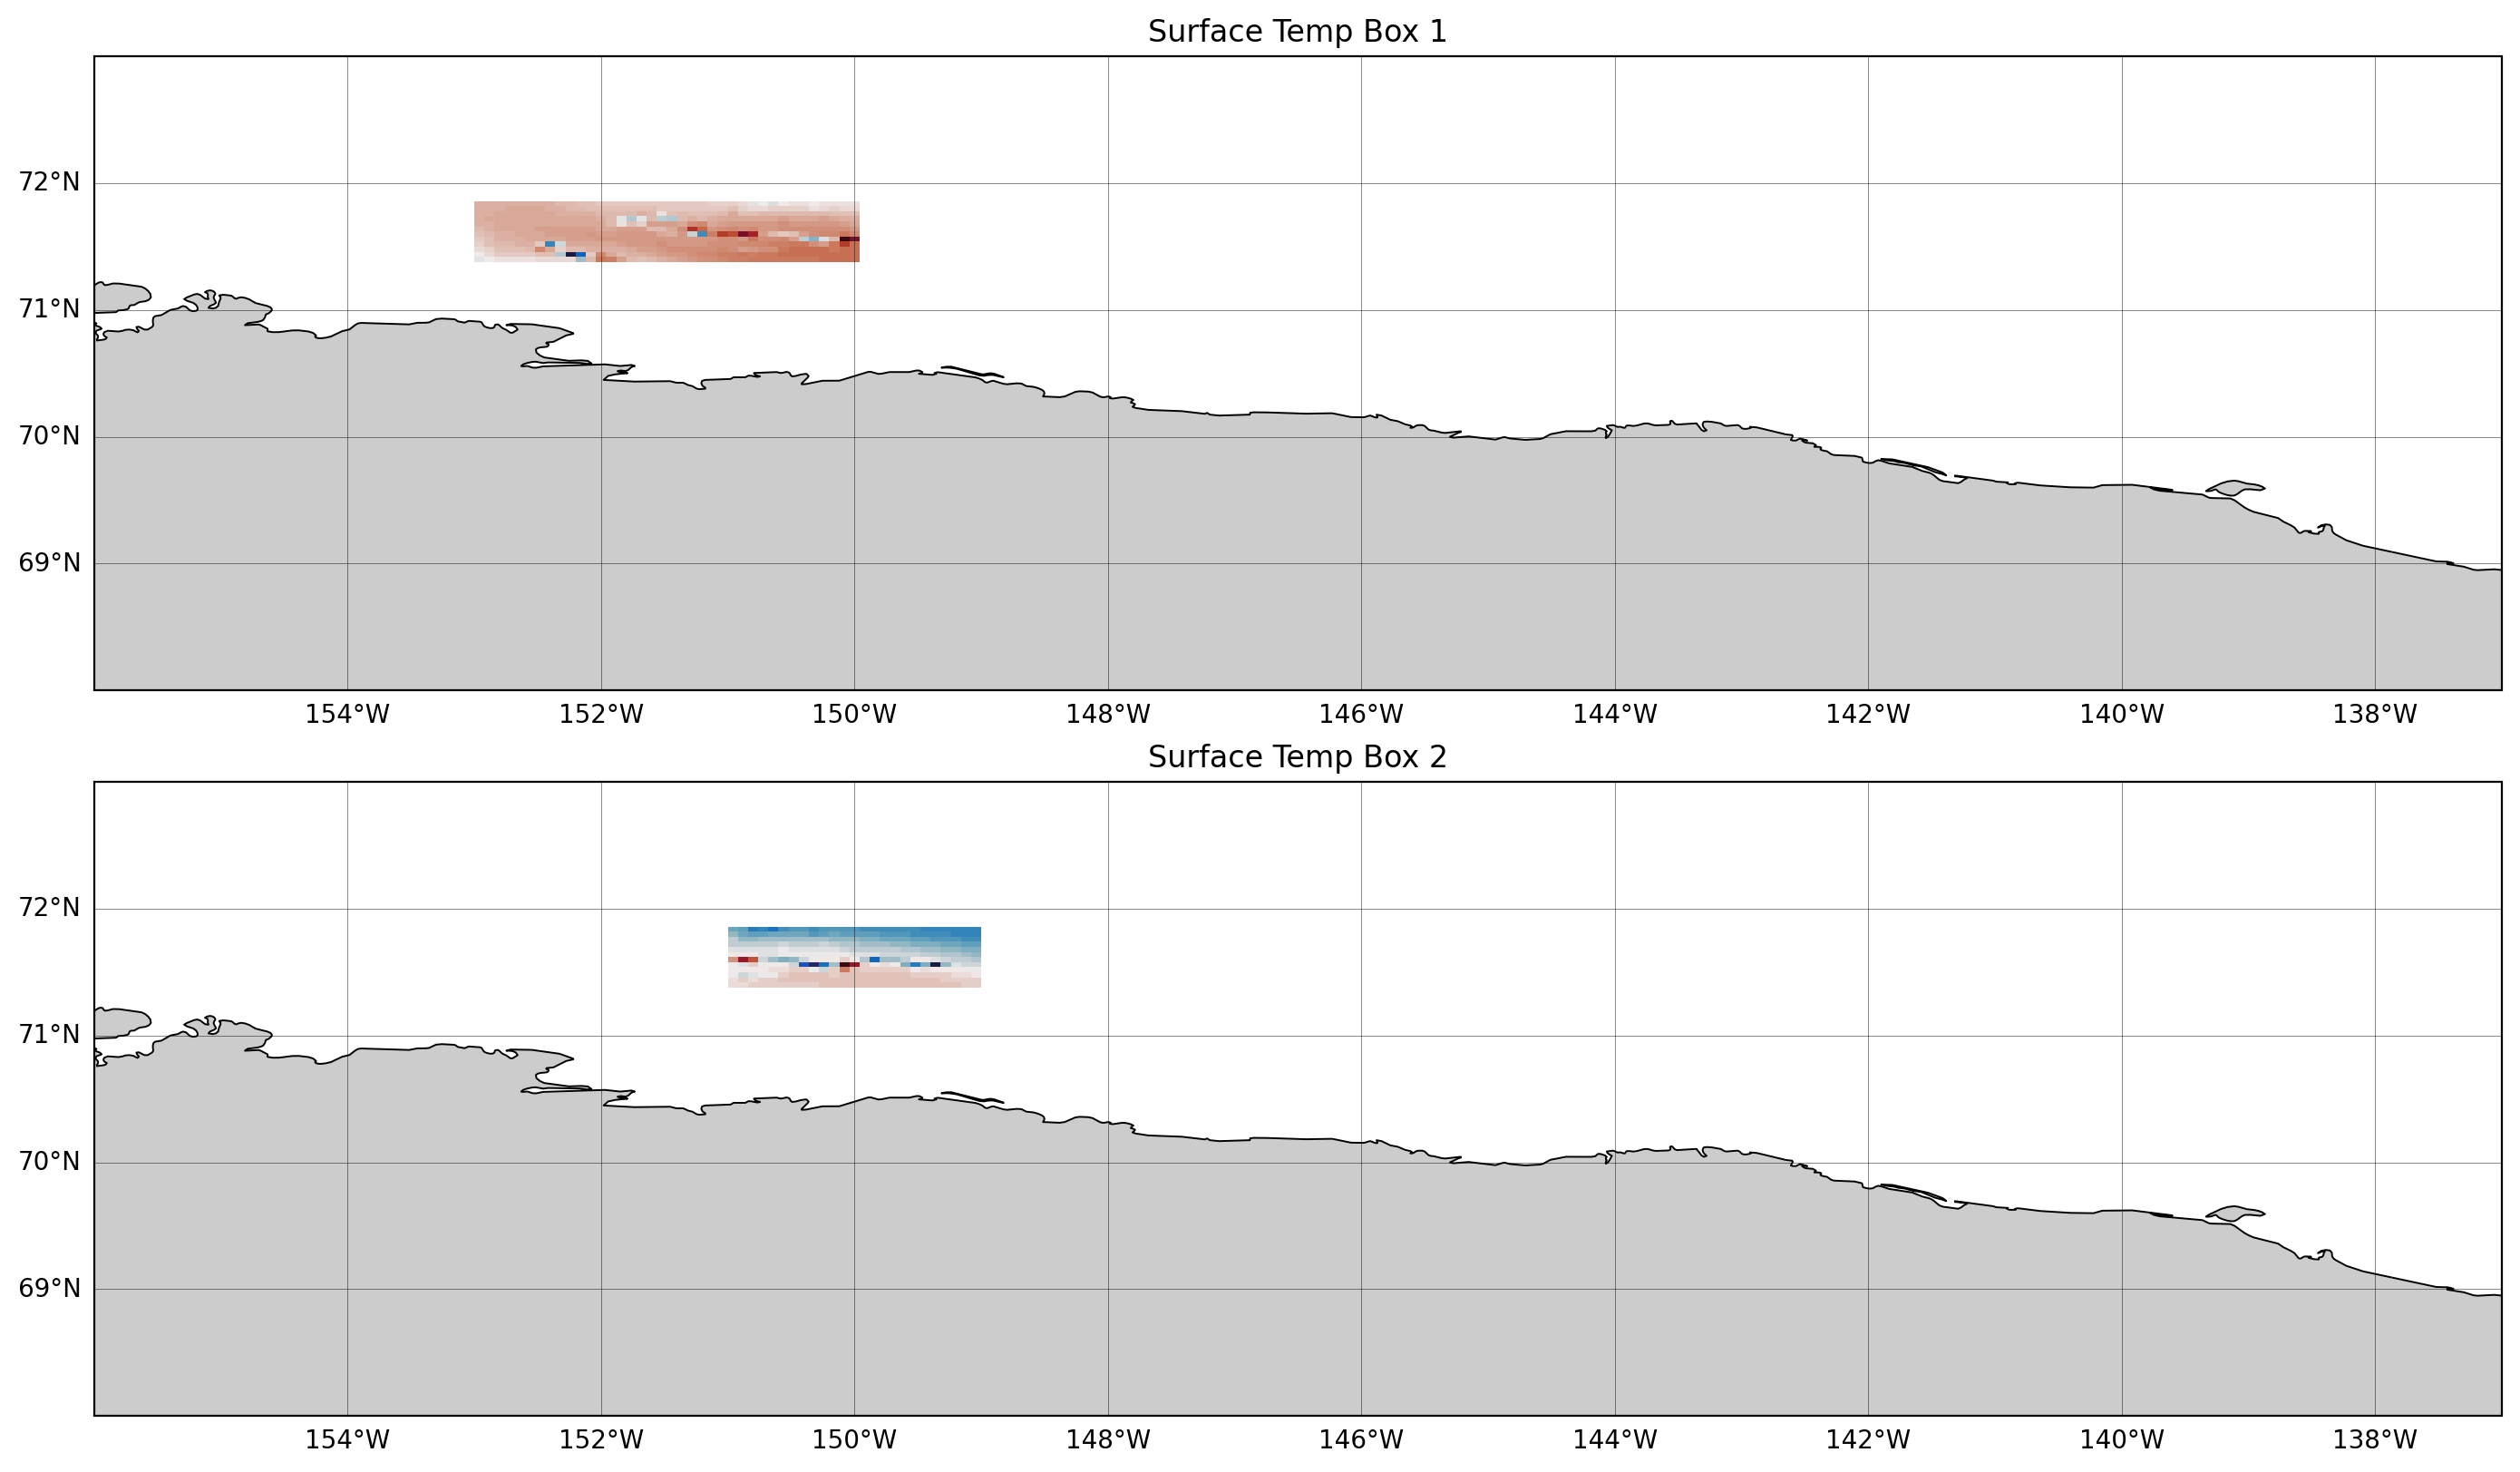

In [21]:
# Plot these regions

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface salt in this region
m1 = temp_reg1[110,0,:,:].plot(
    x='lon', y='lat',
    ax=ax[0],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray"
)
ax[0].set_title('Surface Temp Box 1')

# Plot surface temp in this region
m2 = temp_reg2[110,0,:,:].plot(
    x='lon', y='lat',
    ax=ax[1],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray"
)
ax[1].set_title('Surface Temp Box 2')

# Add details to each plot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

In [22]:
print('reg1 depths: ', salt_reg1.depth.values)
print('reg2 depths: ', salt_reg2.depth.values)

reg1 depths:  [0.00e+00 2.00e+00 4.00e+00 6.00e+00 8.00e+00 1.00e+01 1.20e+01 1.50e+01
 2.00e+01 2.50e+01 3.00e+01 3.50e+01 4.00e+01 4.50e+01 5.00e+01 6.00e+01
 7.00e+01 8.00e+01 9.00e+01 1.00e+02 1.25e+02 1.50e+02 2.00e+02 2.50e+02
 3.00e+02 3.50e+02 4.00e+02 5.00e+02 6.00e+02 7.00e+02 8.00e+02 9.00e+02
 1.00e+03 1.25e+03 1.50e+03 2.00e+03 2.50e+03 3.00e+03 4.00e+03 5.00e+03]
reg2 depths:  [0.00e+00 2.00e+00 4.00e+00 6.00e+00 8.00e+00 1.00e+01 1.20e+01 1.50e+01
 2.00e+01 2.50e+01 3.00e+01 3.50e+01 4.00e+01 4.50e+01 5.00e+01 6.00e+01
 7.00e+01 8.00e+01 9.00e+01 1.00e+02 1.25e+02 1.50e+02 2.00e+02 2.50e+02
 3.00e+02 3.50e+02 4.00e+02 5.00e+02 6.00e+02 7.00e+02 8.00e+02 9.00e+02
 1.00e+03 1.25e+03 1.50e+03 2.00e+03 2.50e+03 3.00e+03 4.00e+03 5.00e+03]


**Guiding Math**  

So we want to loop through each cell and calculate:   

**Density**  
$$
\rho = \rho_0 [1 + 7.6*10^{-4} (salt-S_0) - 1.7*10^{-4} (temp - T_0)]
$$

where   
$\rho_0 = 1025.0$  $kg/m^{3}$  
$S_0 = 34.0$ $PSU$  
$T_0 = 2.0 \degree C$  

**Bouyancy**  
$$
b = \frac{g(\rho_0 - \rho)}{\rho_0}
$$

where  
$g = 9.81$ $m/s^{2}$

**Gradients/Derivatives in Buoyancy**   
Horizontal will be used for $M^{2}$ and vertical will be used for $N^{2}$

$$
M^{2} = \sqrt{(\frac{\partial b}{\partial x})^{2} + (\frac{\partial b}{\partial y})^{2}}
$$
$$
N^{2} = \frac{\partial b}{\partial z}
$$  

And the distances can be calculated by  
$$
dx = R \cos(\phi)\Delta \lambda  
$$
$$
dy = R \Delta \phi  
$$
where  
$\phi$ = latitude  
$\Delta \lambda$ is the difference in degrees longitude  
for $dy$ the $\Delta \phi$ is in radians 

In [23]:
# Set all the constants
rho_0 = 1025 # kg/m3
S_0 = 34.0 # PSU
T_0 = 2.0 # C
g = 9.81 # m/s2

# Calculate density in the region of interest
# Box 1
reg1_rho = rho_0*(1 + (7.6e-4)*(salt_reg1-S_0) - (1.7e-4)*(temp_reg1-T_0))
print('salt_reg1 shape: ', np.shape(salt_reg1))
print('reg1_rho shape: ', np.shape(reg1_rho))
# Box 2
reg2_rho = rho_0*(1 + (7.6e-4)*(salt_reg2-S_0) - (1.7e-4)*(temp_reg2-T_0))
print('salt_reg2 shape: ', np.shape(salt_reg2))
print('reg2_rho shape: ', np.shape(reg2_rho))

# Calculate buoyancy in this region
# Box 1
buoy_reg1 = (g*(reg1_rho-rho_0))/(rho_0)
print('buoy_reg1 shape: ', np.shape(buoy_reg1))
# Box 2
buoy_reg2 = (g*(reg2_rho-rho_0))/(rho_0)
print('buoy_reg2 shape: ', np.shape(buoy_reg2))

salt_reg1 shape:  (2075, 40, 12, 38)
reg1_rho shape:  (2075, 40, 12, 38)
salt_reg2 shape:  (2075, 40, 12, 25)
reg2_rho shape:  (2075, 40, 12, 25)
buoy_reg1 shape:  (2075, 40, 12, 38)
buoy_reg2 shape:  (2075, 40, 12, 25)


In [24]:
# Calculate dx in HYCOM data (in shape of our region)
R = 6371000 # m, radius of Earth <3 

# Calculate the difference in degrees lon
# Box 1
d_lon_reg1 = salt_reg1.lon.diff('lon')
dx_reg1 = R * np.cos(np.deg2rad(np.mean(salt_reg1.lat)))*d_lon_reg1
print('dx_reg1 shape: ', np.shape(dx_reg1))
# Box 2
d_lon_reg2 = salt_reg2.lon.diff('lon')
dx_reg2 = R * np.cos(np.deg2rad(np.mean(salt_reg2.lat)))*d_lon_reg2
print('dx_reg2 shape: ', np.shape(dx_reg2))

# Calculcate difference in lat
# Box 1
d_lat_reg1 = salt_reg1.lat.diff('lat')
dy_reg1 = R * np.deg2rad(d_lat_reg1)
print('dy_reg1 shape: ', np.shape(dy_reg1))
# Box 2
d_lat_reg2 = salt_reg2.lat.diff('lat')
dy_reg2 = R * np.deg2rad(d_lat_reg2)
print('dy_reg2 shape: ', np.shape(dy_reg2))

# Calculate vertical difference
# Box 1
dz_reg1 = salt_reg1.depth.diff('depth')
print('dz_reg1 shape: ', np.shape(dz_reg1))
# Box 2
dz_reg2 = salt_reg2.depth.diff('depth')
print('dz_reg2 shape: ', np.shape(dz_reg2))


dx_reg1 shape:  (37,)
dx_reg2 shape:  (24,)
dy_reg1 shape:  (11,)
dy_reg2 shape:  (11,)
dz_reg1 shape:  (39,)
dz_reg2 shape:  (39,)


In [25]:
# Check if buoy differencing works 
# Box 1
db_reg1 = buoy_reg1.diff('lon')
print('db_reg1: ', db_reg1[0,0,0,:].values)
print('buoy_reg1[0,0,0,0:5]: ', buoy_reg1[0,0,0,0:5].values)
print('buoy_reg1[0,0,0:5,0]: ', buoy_reg1[0,0,0:5,0].values)
# Box 2
db_reg2 = buoy_reg2.diff('lon')
print('db_reg2: ', db_reg2[0,0,0,:].values)
print('buoy_reg2[0,0,0,0:5]: ', buoy_reg2[0,0,0,0:5].values)
print('buoy_reg2[0,0,0:5,0]: ', buoy_reg2[0,0,0:5,0].values)

db_reg1:  [-7.45577065e-05 -3.33054597e-04 -2.56812705e-04 -1.43333873e-04
  7.45150452e-06 -6.70919815e-05 -5.06205528e-04 -6.79342238e-04
 -8.07744661e-04 -4.37432542e-04 -1.88053940e-04  1.13496233e-04
  9.85932243e-05  3.72717430e-05 -9.11274994e-05 -2.56826926e-04
 -4.15063808e-04 -5.43463050e-04 -5.95683644e-04 -5.82415798e-04
 -3.55409110e-04 -3.33054597e-04 -1.88053940e-04 -1.49101192e-04
 -1.06044729e-04 -8.94749359e-05 -5.38589373e-05 -7.45577065e-05
 -6.87729858e-05 -8.94607155e-05 -8.36759949e-05 -9.69264404e-05
 -1.35868148e-04  1.32504456e-05 -3.15012428e-05  0.00000000e+00
  0.00000000e+00]
buoy_reg1[0,0,0,0:5]:  [-0.02670566 -0.02678021 -0.02711327 -0.02737008 -0.02751342]
buoy_reg1[0,0,0:5,0]:  [-0.02670566 -0.02813145 -0.02910489 -0.03003527 -0.03084303]
db_reg2:  [-8.94749359e-05 -5.38589373e-05 -7.45577065e-05 -6.87729858e-05
 -8.94607155e-05 -8.36759949e-05 -9.69264404e-05 -1.35868148e-04
  1.32504456e-05 -3.15012428e-05  0.00000000e+00  0.00000000e+00
 -2.06877296

In [26]:
# Calculate the discrete derivatives 
# Box 1
db_dx_reg1 = (buoy_reg1.diff('lon'))/dx_reg1
db_dy_reg1 = (buoy_reg1.diff('lat'))/dy_reg1
db_dz_reg1 = (buoy_reg1.diff('depth'))/dz_reg1
# Box 2
db_dx_reg2 = (buoy_reg2.diff('lon'))/dx_reg2
db_dy_reg2 = (buoy_reg2.diff('lat'))/dy_reg2
db_dz_reg2 = (buoy_reg2.diff('depth'))/dz_reg2

In [27]:
# Calculate M2
# Box 1
M2_reg1 = np.sqrt((db_dx_reg1)**2 + (db_dy_reg1)**2)
print('M2_reg1 shape: ', np.shape(M2_reg1))
# Box 2
M2_reg2 = np.sqrt((db_dx_reg2)**2 + (db_dy_reg2)**2)
print('M2_reg2 shape: ', np.shape(M2_reg2))

# Calculate N2
# Box 1
N2_reg1 = db_dz_reg1
print('N2_reg1 shape: ', np.shape(N2_reg1))
# Box 2
N2_reg2 = db_dz_reg2
print('N2_reg2 shape: ', np.shape(N2_reg2))

M2_reg1 shape:  (2075, 40, 11, 37)
M2_reg2 shape:  (2075, 40, 11, 24)
N2_reg1 shape:  (2075, 39, 12, 38)
N2_reg2 shape:  (2075, 39, 12, 25)


In [28]:
# For M2 we just want the surface so restrict to surface cells
M2_reg1_surf = M2_reg1[:,0,:,:]
M2_reg2_surf = M2_reg2[:,0,:,:]

# And now weight by the volume (just of surface)
# BUT I think the volume weighting is for the histogram count,
# not for the actual values....see xhistogram 
# to learn more: https://xhistogram.readthedocs.io/en/latest/tutorial.html 

# Box 1
# Calculate the volume of each surface cell
cell_vol_surf_reg1 = dz_reg1[0]*dy_reg1*dx_reg1
# Print statements to check this
print('Box 1')
print('cell vol surf shape: ', np.shape(cell_vol_surf_reg1))
print('M2_surf shape: ', np.shape(M2_reg1_surf))
print('dz: ' + str(dz_reg1[0].values) + ' dy: ' + str(dy_reg1[0].values) + ' dx: ' + str(dx_reg1[0].values))
print('dz[0]*dy[0]*dx[0]: ', dz_reg1[0].values*dy_reg1[0].values*dx_reg1[0].values)
print('cell_vol_surf: ', cell_vol_surf_reg1[0,0].values)

# Box 2
# Calculate the volume of each surface cell
cell_vol_surf_reg2 = dz_reg2[0]*dy_reg2*dx_reg2
# Print statements to check this
print('Box 2')
print('cell vol surf shape: ', np.shape(cell_vol_surf_reg2))
print('M2_surf shape: ', np.shape(M2_reg2_surf))
print('dz: ' + str(dz_reg2[0].values) + ' dy: ' + str(dy_reg2[0].values) + ' dx: ' + str(dx_reg2[0].values))
print('dz[0]*dy[0]*dx[0]: ', dz_reg2[0].values*dy_reg2[0].values*dx_reg2[0].values)
print('cell_vol_surf: ', cell_vol_surf_reg2[0,0].values)


# Get total volume
# Box 1
tot_vol_surf_reg1 = np.sum(cell_vol_surf_reg1)
print('Box 1 total surface volume (m3): ', tot_vol_surf_reg1.values)
# Box 2
tot_vol_surf_reg2 = np.sum(cell_vol_surf_reg2)
print('Box 2 total surface volume (m3): ', tot_vol_surf_reg2.values)

# Box 1
# Multiply M2_surf by the volumes and divide to get 
# volume-weighted values - this is not what was meant, want to volume-weight the histogram
M2_surf_vol_reg1_weighted = (M2_reg1_surf*cell_vol_surf_reg1)/tot_vol_surf_reg1
# Check this
check_reg1 = (M2_reg1_surf[0,0,0]*dz_reg1[0]*dx_reg1[0]*dy_reg1[0])/tot_vol_surf_reg1
print(check_reg1.values)
print(M2_surf_vol_reg1_weighted[0,0,0].values)

# Box 2
# Multiply M2_surf by the volumes and divide to get 
# volume-weighted values - this is not what was meant, want to volume-weight the histogram
M2_surf_vol_reg2_weighted = (M2_reg2_surf*cell_vol_surf_reg2)/tot_vol_surf_reg2
# Check this
check_reg2 = (M2_reg2_surf[0,0,0]*dz_reg2[0]*dx_reg2[0]*dy_reg2[0])/tot_vol_surf_reg2
print(check_reg2.values)
print(M2_surf_vol_reg2_weighted[0,0,0].values)

# So leave the volume-weighted calculations for now but I think 
# these should actually be done in xhistogram so don't use that
# variable (M2_surf_vol_weighted) -->correct! but numpy hehe 


Box 1
cell vol surf shape:  (11, 37)
M2_surf shape:  (2075, 11, 37)
dz: 2.0 dy: 4447.898867778179 dx: 160745.50492866553
dz[0]*dy[0]*dx[0]:  1429959498.7452862
cell_vol_surf:  1429959498.7452862
Box 2
cell vol surf shape:  (11, 24)
M2_surf shape:  (2075, 11, 24)
dz: 2.0 dy: 4447.898867778179 dx: 160745.50492866553
dz[0]*dy[0]*dx[0]:  1429959498.7452862
cell_vol_surf:  1429959498.7452862
Box 1 total surface volume (m3):  581853356274.2412
Box 2 total surface volume (m3):  377424229986.9081
8.093093752577884e-10
8.093093752577884e-10
3.66250345529916e-10
3.66250345529916e-10


In [29]:
# Check M2_surf_vol_weighted
# print(M2[0,0,0,0].values)
# print((1434465474.3622334*M2[0,0,0,0].values)/137679142771.56787)
# print((M2_surf_vol_weighted[0,0,0].values))

In [30]:
# Print some basic stats
# Box 1
print('Box 1')
print('M2_surf')
print('M2_surf min: ', M2_reg1_surf.min().values)
print('M2_surf max: ', M2_reg1_surf.max().values)
print('M2_surf mean: ', M2_reg1_surf.mean().values)
print('M2_surf std: ', M2_reg1_surf.std().values)
print('M2_surf_vol_weighted')
print('M2_surf_vol_weighted min: ', M2_surf_vol_reg1_weighted.min().values)
print('M2_surf_vol_weighted max: ', M2_surf_vol_reg1_weighted.max().values)
print('M2_surf_vol_weighted mean: ', M2_surf_vol_reg1_weighted.mean().values)
print('M2_surf_vol_weighted std: ', M2_surf_vol_reg1_weighted.std().values)

# Box 2
print('Box 2')
print('M2_surf')
print('M2_surf min: ', M2_reg2_surf.min().values)
print('M2_surf max: ', M2_reg2_surf.max().values)
print('M2_surf mean: ', M2_reg2_surf.mean().values)
print('M2_surf std: ', M2_reg2_surf.std().values)
print('M2_surf_vol_weighted')
print('M2_surf_vol_weighted min: ', M2_surf_vol_reg2_weighted.min().values)
print('M2_surf_vol_weighted max: ', M2_surf_vol_reg2_weighted.max().values)
print('M2_surf_vol_weighted mean: ', M2_surf_vol_reg2_weighted.mean().values)
print('M2_surf_vol_weighted std: ', M2_surf_vol_reg2_weighted.std().values)


Box 1
M2_surf
M2_surf min:  0.0
M2_surf max:  3.774931063074467e-06
M2_surf mean:  1.1426152002065972e-07
M2_surf std:  1.7426038028639812e-07
M2_surf_vol_weighted
M2_surf_vol_weighted min:  0.0
M2_surf_vol_weighted max:  9.275479654123242e-09
M2_surf_vol_weighted mean:  2.807416798246648e-10
M2_surf_vol_weighted std:  4.2816248474521173e-10
Box 2
M2_surf
M2_surf min:  0.0
M2_surf max:  3.7921375694132643e-06
M2_surf mean:  9.655678580090103e-08
M2_surf std:  1.4771211498087914e-07
M2_surf_vol_weighted
M2_surf_vol_weighted min:  0.0
M2_surf_vol_weighted max:  1.4356436267596584e-08
M2_surf_vol_weighted mean:  3.6574626508824286e-10
M2_surf_vol_weighted std:  5.595189353583308e-10


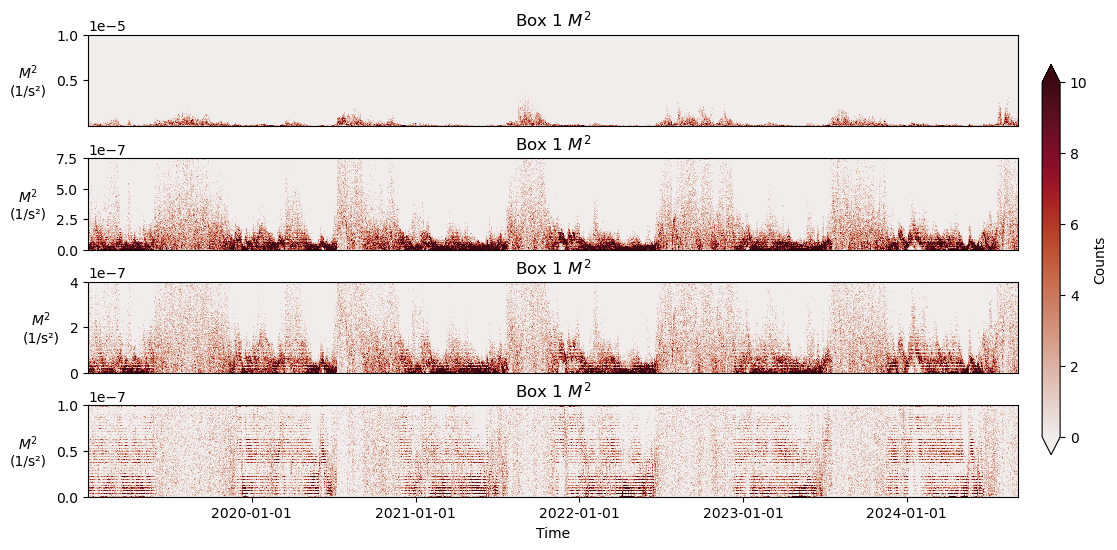

In [31]:
# Plot M2 - hist2d - Box 1
# For each time, we want all depths/lat/lon

# Prep the data
# Flatten M2 over space
M2_reg1_surf_stack = M2_reg1_surf.stack(points=('lat', 'lon'))
M2_reg1_surf_flat = M2_reg1_surf_stack.values.flatten()

# Convert xarray time to matplotlib numbers
times_num_reg1 = mdates.date2num(M2_reg1_surf_stack.time.values.astype("datetime64[ms]"))

# Repeat each time for all spatial points
time_flat_reg1 = np.repeat(times_num_reg1, M2_reg1_surf_stack.sizes["points"])

# Define M2 and time bins
n_data_bins = 300 # 100, 350
#data_bins_all_reg1 = np.linspace(np.nanmin(M2_reg1_surf_flat[M2_reg1_surf_flat != 0]), np.nanmax(M2_reg1_surf_flat), n_data_bins)
data_bins_all_reg1 = np.logspace(-9, -5, 300) # (-9, -5, 350)
data_bins_low_reg1 = np.linspace(np.nanmin(M2_reg1_surf_flat), 0.75e-6, n_data_bins)
data_bins_lower_reg1 = np.linspace(np.nanmin(M2_reg1_surf_flat), 4e-7, n_data_bins)
data_bins_lowest_reg1 = np.linspace(np.nanmin(M2_reg1_surf_flat), 1e-7, n_data_bins)
dt = times_num_reg1[1] - times_num_reg1[0]   # time bin = one time step
time_bins_reg1 = np.arange(times_num_reg1.min(), times_num_reg1.max() + dt, dt)

# Get the info for the 2D histogram
H_reg1, xedges_reg1, yedges_reg1 = np.histogram2d(time_flat_reg1, M2_reg1_surf_flat, bins=[time_bins_reg1, data_bins_all_reg1])
H2_reg1, xedges2_reg1, yedges2_reg1 = np.histogram2d(time_flat_reg1, M2_reg1_surf_flat, bins=[time_bins_reg1, data_bins_low_reg1])
H3_reg1, xedges3_reg1, yedges3_reg1 = np.histogram2d(time_flat_reg1, M2_reg1_surf_flat, bins=[time_bins_reg1, data_bins_lower_reg1])
H4_reg1, xedges4_reg1, yedges4_reg1 = np.histogram2d(time_flat_reg1, M2_reg1_surf_flat, bins=[time_bins_reg1, data_bins_lowest_reg1])

# Now plot this as a figure
# Do a few versions with different ranges
# Make the figure 
fig, ax = plt.subplots(4, 1, figsize=(12, 6))

# Set the meshes
X_reg1, Y_reg1 = np.meshgrid(xedges_reg1, yedges_reg1)
X2_reg1, Y2_reg1 = np.meshgrid(xedges2_reg1, yedges2_reg1)
X3_reg1, Y3_reg1 = np.meshgrid(xedges3_reg1, yedges3_reg1)
X4_reg1, Y4_reg1 = np.meshgrid(xedges4_reg1, yedges4_reg1)

# Set the min/max counts 
min_count = 0
max_count = 10

# Plot the data as pcolormesh
c1 = ax[0].pcolormesh(X_reg1, Y_reg1, H_reg1.T, shading='auto', cmap=cmo.amp, vmin=min_count, vmax=max_count)
c2 = ax[1].pcolormesh(X2_reg1, Y2_reg1, H2_reg1.T, shading='auto', cmap=cmo.amp, vmin=min_count, vmax=max_count)
c3 = ax[2].pcolormesh(X3_reg1, Y3_reg1, H3_reg1.T, shading='auto', cmap=cmo.amp, vmin=min_count, vmax=max_count)
c4 = ax[3].pcolormesh(X4_reg1, Y4_reg1, H4_reg1.T, shading='auto', cmap=cmo.amp, vmin=min_count, vmax=max_count)

for r in range(4):
    # Label the plot
    ax[r].set_xlabel("Time")
    ax[r].set_ylabel("$M^{2}$ \n(1/s\u00b2)", rotation=0, labelpad=20, va='center')
    ax[r].set_title("Box 1 $M^{2}$")

# Format time (for last plot)
ax[0].xaxis.set_visible(False)
ax[1].xaxis.set_visible(False)
ax[2].xaxis.set_visible(False)
ax[3].xaxis_date()
ax[3].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.18,0.015,0.65])
fig.colorbar(c1,ax=ax[1],extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)

plt.subplots_adjust(hspace=0.35)

plt.show()



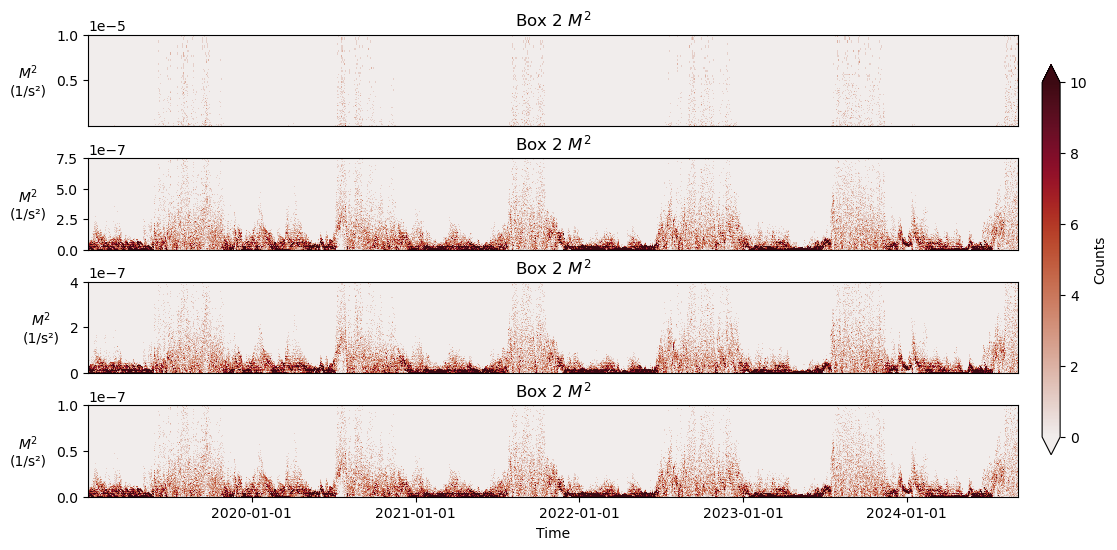

In [32]:
# Plot M2 - hist2d - Box 2
# For each time, we want all depths/lat/lon

# Prep the data
# Flatten M2 over space
M2_reg2_surf_stack = M2_reg2_surf.stack(points=('lat', 'lon'))
M2_reg2_surf_flat = M2_reg2_surf_stack.values.flatten()

# Convert xarray time to matplotlib numbers
times_num_reg2 = mdates.date2num(M2_reg2_surf_stack.time.values.astype("datetime64[ms]"))

# Repeat each time for all spatial points
time_flat_reg2 = np.repeat(times_num_reg2, M2_reg2_surf_stack.sizes["points"])

# Define M2 and time bins
n_data_bins = 300 # 100, 350
data_bins_all_reg2 = np.logspace(-9, -5, 300)
#data_bins_all_reg2 = np.linspace(np.nanmin(M2_reg2_surf_flat), np.nanmax(M2_reg2_surf_flat), n_data_bins)
data_bins_low_reg2 = np.linspace(np.nanmin(M2_reg2_surf_flat), 0.75e-6, n_data_bins)
data_bins_lower_reg2 = np.linspace(np.nanmin(M2_reg2_surf_flat), 4e-7, n_data_bins)
data_bins_lowest_reg2 = np.linspace(np.nanmin(M2_reg2_surf_flat), 1e-7, n_data_bins)
dt = times_num_reg2[1] - times_num_reg1[0]   # time bin = one time step
time_bins_reg2 = np.arange(times_num_reg2.min(), times_num_reg2.max() + dt, dt)

# Get the info for the 2D histogram
H_reg2, xedges_reg2, yedges_reg2 = np.histogram2d(time_flat_reg2, M2_reg2_surf_flat, bins=[time_bins_reg2, data_bins_all_reg2])
H2_reg2, xedges2_reg2, yedges2_reg2 = np.histogram2d(time_flat_reg2, M2_reg2_surf_flat, bins=[time_bins_reg2, data_bins_low_reg2])
H3_reg2, xedges3_reg2, yedges3_reg2 = np.histogram2d(time_flat_reg2, M2_reg2_surf_flat, bins=[time_bins_reg2, data_bins_lower_reg2])
H4_reg2, xedges4_reg2, yedges4_reg2 = np.histogram2d(time_flat_reg2, M2_reg2_surf_flat, bins=[time_bins_reg2, data_bins_lowest_reg2])

# Now plot this as a figure
# Do a few versions with different ranges
# Make the figure 
fig, ax = plt.subplots(4, 1, figsize=(12, 6))

# Set the meshes
X_reg2, Y_reg2 = np.meshgrid(xedges_reg2, yedges_reg2)
X2_reg2, Y2_reg2 = np.meshgrid(xedges2_reg2, yedges2_reg2)
X3_reg2, Y3_reg2 = np.meshgrid(xedges3_reg2, yedges3_reg2)
X4_reg2, Y4_reg2 = np.meshgrid(xedges4_reg2, yedges4_reg2)

# Set the min/max counts 
min_count = 0
max_count = 10

# Plot the data as pcolormesh
c1 = ax[0].pcolormesh(X_reg2, Y_reg2, H2_reg2.T, shading='auto', cmap=cmo.amp, vmin=min_count, vmax=max_count)
c2 = ax[1].pcolormesh(X2_reg2, Y2_reg2, H2_reg2.T, shading='auto', cmap=cmo.amp, vmin=min_count, vmax=max_count)
c3 = ax[2].pcolormesh(X3_reg2, Y3_reg2, H2_reg2.T, shading='auto', cmap=cmo.amp, vmin=min_count, vmax=max_count)
c4 = ax[3].pcolormesh(X4_reg2, Y4_reg2, H2_reg2.T, shading='auto', cmap=cmo.amp, vmin=min_count, vmax=max_count)

for r in range(4):
    # Label the plot
    ax[r].set_xlabel("Time")
    ax[r].set_ylabel("$M^{2}$ \n(1/s\u00b2)", rotation=0, labelpad=20, va='center')
    ax[r].set_title("Box 2 $M^{2}$")

# Format time (for last plot)
ax[0].xaxis.set_visible(False)
ax[1].xaxis.set_visible(False)
ax[2].xaxis.set_visible(False)
ax[3].xaxis_date()
ax[3].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.18,0.015,0.65])
fig.colorbar(c1,ax=ax[1],extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)

plt.subplots_adjust(hspace=0.35)

plt.show()

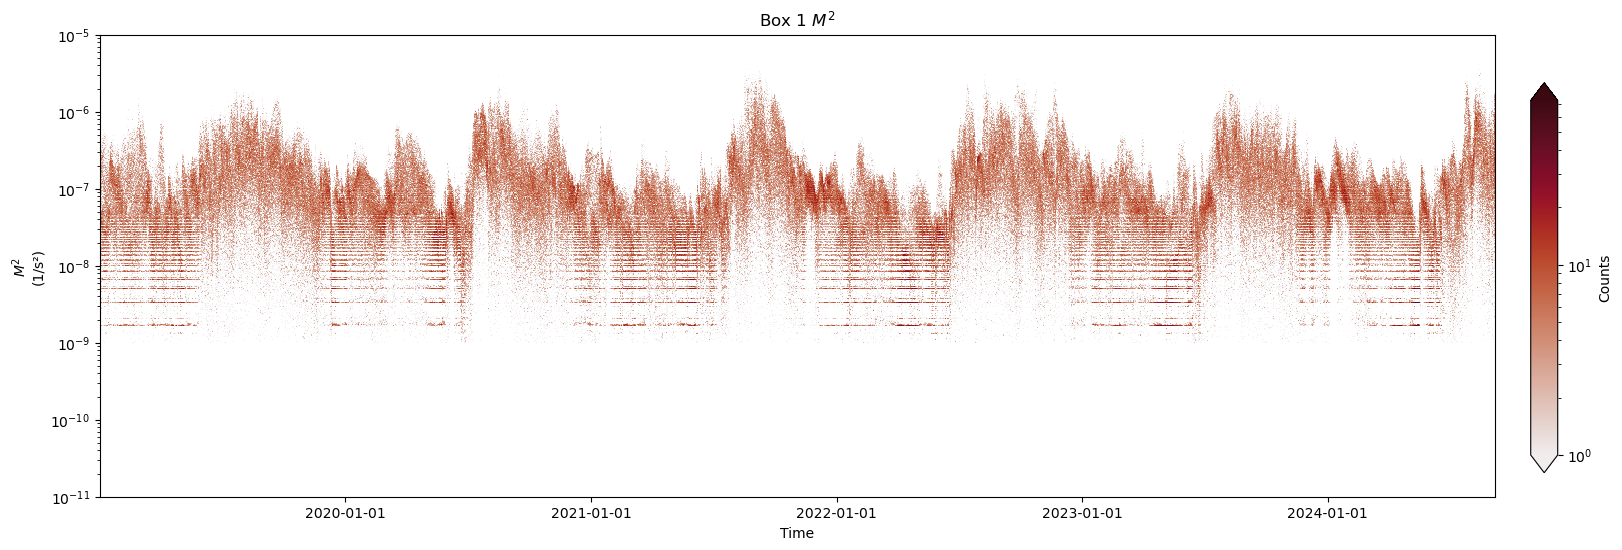

In [33]:
# Plot M2 again on log scale with hist2d and pcolormesh - Box 1
fig, ax = plt.subplots(figsize=(18, 6))

# ---- LOG SCALE REQUIREMENTS ----
# yedges must be strictly positive
mask_reg1 = yedges_reg1 > 0
yedges_reg1_pos = yedges_reg1[mask_reg1]
H_reg1_pos = H_reg1[:, mask_reg1[:-1]]  # match bin count to edges

X_reg1, Y_reg1 = np.meshgrid(xedges_reg1, yedges_reg1_pos)

# Plot the data as pcolormesh
c1 = ax.pcolormesh(X_reg1, Y_reg1, H_reg1_pos.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

ax.set_xlabel("Time")
ax.set_ylabel("$M^{2}$ \n(1/s\u00b2)")
ax.set_title("Box 1 $M^{2}$")
ax.set_yscale('log')
ax.set_ylim(10e-12, 10e-6)

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.15,0.015,0.65])
fig.colorbar(c1,ax=ax,extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)

plt.subplots_adjust(hspace=0.35)

plt.show()

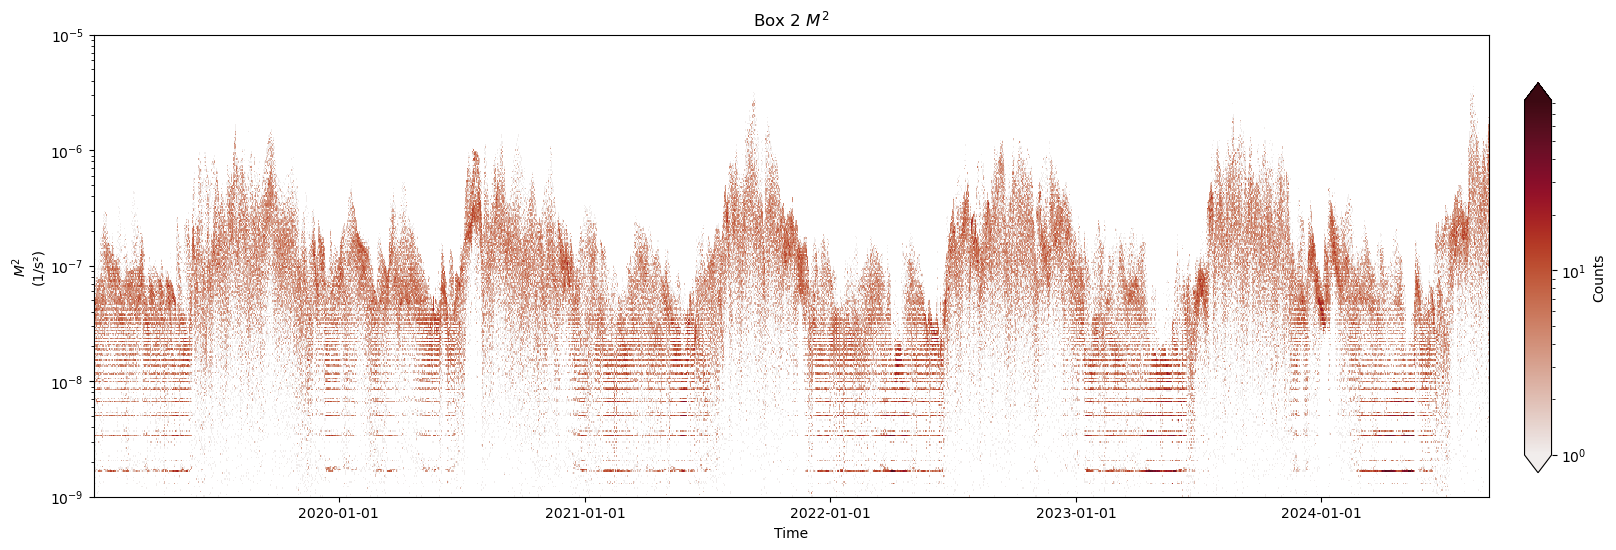

In [34]:
# Plot M2 again on log scale with hist2d and pcolormesh - Box 2
fig, ax = plt.subplots(figsize=(18, 6))

# ---- LOG SCALE REQUIREMENTS ----
# yedges must be strictly positive
mask_reg2 = yedges_reg2 > 0
yedges_reg2_pos = yedges_reg2[mask_reg2]
H_reg2_pos = H_reg2[:, mask_reg2[:-1]]  # match bin count to edges

X_reg2, Y_reg2 = np.meshgrid(xedges_reg2, yedges_reg2_pos)

# Plot the data as pcolormesh
c1 = ax.pcolormesh(X_reg2, Y_reg2, H_reg2_pos.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

ax.set_xlabel("Time")
ax.set_ylabel("$M^{2}$ \n(1/s\u00b2)")
ax.set_title("Box 2 $M^{2}$")
ax.set_yscale('log')
ax.set_ylim(10e-10, 10e-6)

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.15,0.015,0.65])
fig.colorbar(c1,ax=ax,extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)

plt.subplots_adjust(hspace=0.35)

plt.show()

In [35]:
# Do this again but with the counts weighted by volume - hist2d

# Box 1
# Flatten the volumes
vol_broadcast_reg1 = cell_vol_surf_reg1.expand_dims(time=M2_reg1_surf.time)
vol_stack_reg1 = vol_broadcast_reg1.stack(points=('lat','lon'))
vol_flat_reg1 = vol_stack_reg1.values.flatten()

# Recalculate the 2D histogram
H_vol_weight_reg1, xedges_vol_weight_reg1, yedges_vol_weight_reg1 = np.histogram2d(time_flat_reg1, M2_reg1_surf_flat,
                                                                     bins=[time_bins_reg1, data_bins_all_reg1],
                                                                    weights=vol_flat_reg1)


# Box 2
# Flatten the volumes
vol_broadcast_reg2 = cell_vol_surf_reg2.expand_dims(time=M2_reg2_surf.time)
vol_stack_reg2 = vol_broadcast_reg2.stack(points=('lat','lon'))
vol_flat_reg2 = vol_stack_reg2.values.flatten()

# Recalculate the 2D histogram
H_vol_weight_reg2, xedges_vol_weight_reg2, yedges_vol_weight_reg2 = np.histogram2d(time_flat_reg2, M2_reg2_surf_flat,
                                                                     bins=[time_bins_reg2, data_bins_all_reg2],
                                                                    weights=vol_flat_reg2)

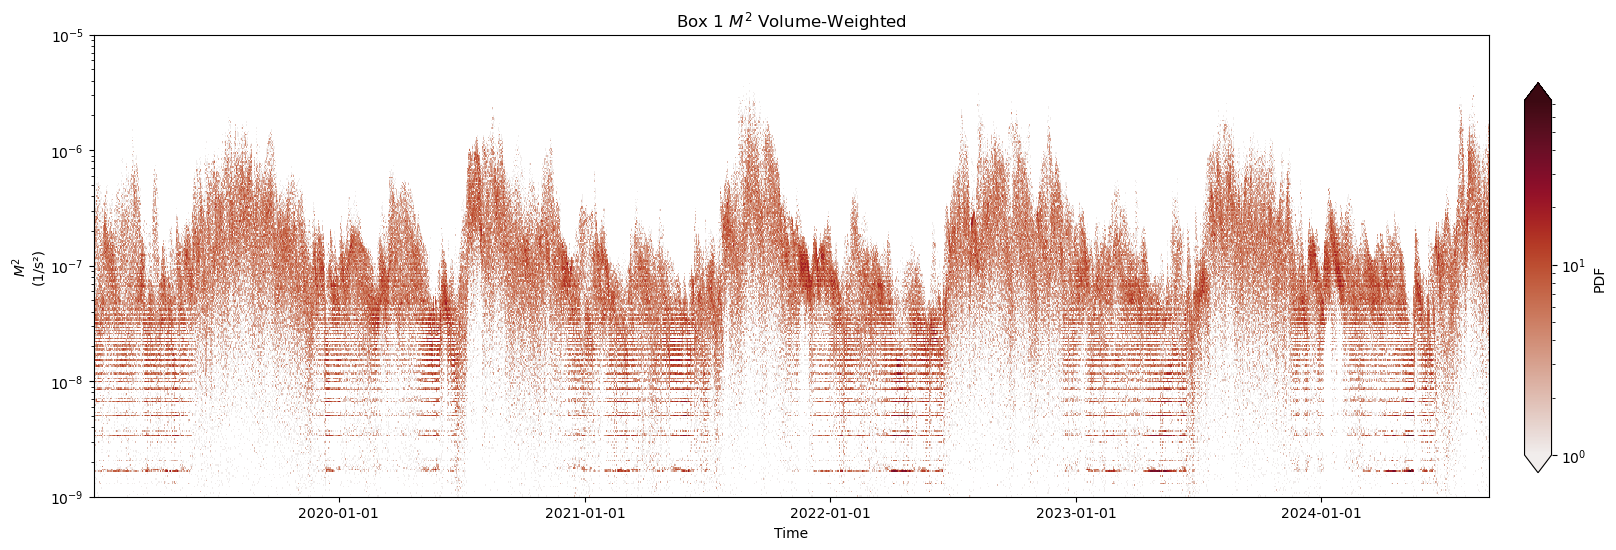

In [36]:
# Plot volume-weighted M2 again on log scale - hist2d and pcolormesh - Box 1
fig, ax = plt.subplots(figsize=(18, 6))

# ---- LOG SCALE REQUIREMENTS ----
# yedges must be strictly positive
mask_vol_weight_reg1 = yedges_vol_weight_reg1 > 0
yedges_vol_weight_pos_reg1 = yedges_vol_weight_reg1[mask_vol_weight_reg1]
H_pos_vol_weight_reg1 = H_reg1[:, mask_vol_weight_reg1[:-1]]  # match bin count to edges

X_vol_weight_reg1, Y_vol_weight_reg1 = np.meshgrid(xedges_vol_weight_reg1, yedges_vol_weight_pos_reg1)

# Plot the data as pcolormesh
c1 = ax.pcolormesh(X_vol_weight_reg1, Y_vol_weight_reg1, H_pos_vol_weight_reg1.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

ax.set_xlabel("Time")
ax.set_ylabel("$M^{2}$ \n(1/s\u00b2)")
ax.set_title("Box 1 $M^{2}$ Volume-Weighted")
ax.set_yscale('log')
ax.set_ylim(10e-10, 10e-6)

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.15,0.015,0.65])
fig.colorbar(c1,ax=ax,extend='both', label='PDF',
             pad=0.03, cax=cbar_ax1)

plt.show()

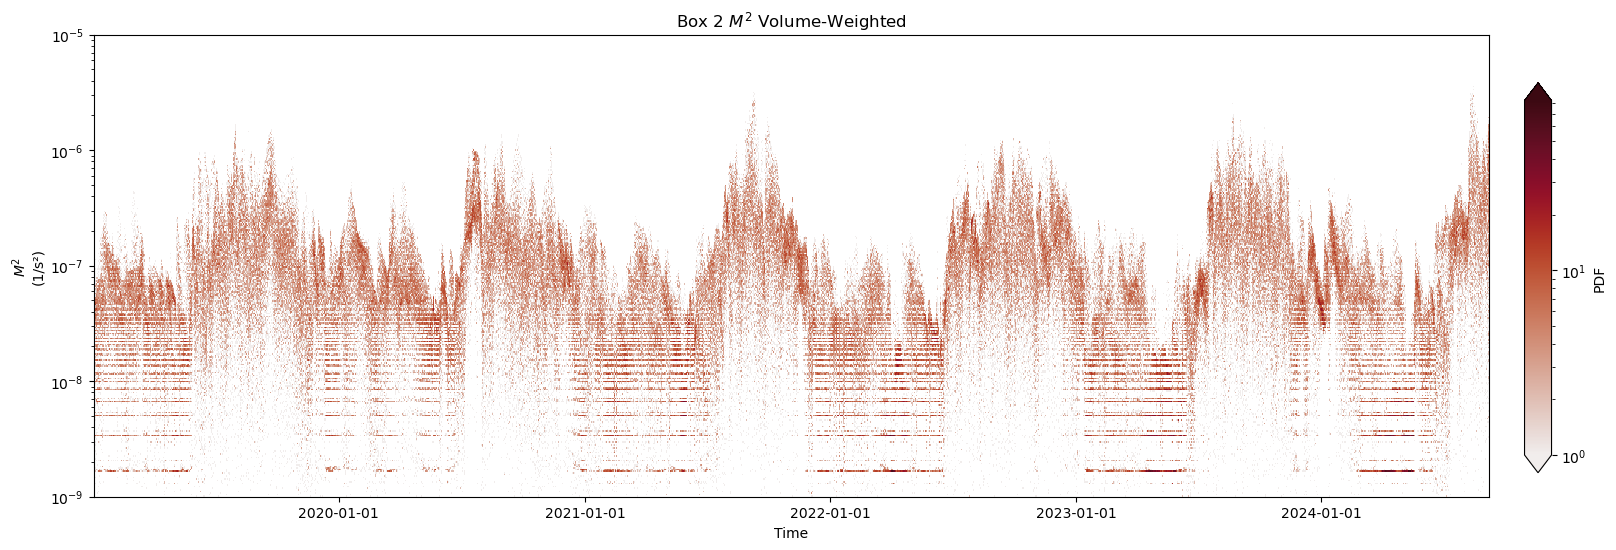

In [37]:
# Plot volume-weighted M2 again on log scale - hist2d and pcolormesh - Box 2
fig, ax = plt.subplots(figsize=(18, 6))

# ---- LOG SCALE REQUIREMENTS ----
# yedges must be strictly positive
mask_vol_weight_reg2 = yedges_vol_weight_reg2 > 0
yedges_vol_weight_pos_reg2 = yedges_vol_weight_reg2[mask_vol_weight_reg2]
H_pos_vol_weight_reg2 = H_reg2[:, mask_vol_weight_reg2[:-1]]  # match bin count to edges

X_vol_weight_reg2, Y_vol_weight_reg2 = np.meshgrid(xedges_vol_weight_reg2, yedges_vol_weight_pos_reg2)

# Plot the data as pcolormesh
c1 = ax.pcolormesh(X_vol_weight_reg2, Y_vol_weight_reg2, H_pos_vol_weight_reg2.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

ax.set_xlabel("Time")
ax.set_ylabel("$M^{2}$ \n(1/s\u00b2)")
ax.set_title("Box 2 $M^{2}$ Volume-Weighted")
ax.set_yscale('log')
ax.set_ylim(10e-10, 10e-6)

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.15,0.015,0.65])
fig.colorbar(c1,ax=ax,extend='both', label='PDF',
             pad=0.03, cax=cbar_ax1)

plt.show()

In [38]:
# # Make the plot of M2 again but with xhistogram
# # Abandoning this for now since it requires redoing the calculations
# # in a way that xarray can track all of the things but we did pure numpy math soooooo

# #hTSw = histogram(ds.smn, ds.tmn, bins=[sbins, tbins], weights=dVol)
# xhist_n_data_bins = 350 # 100


# # Convert xarray time to matplotlib numbers
# times_num_reg1 = mdates.date2num(M2_reg1_surf_stack.time.values.astype("datetime64[ms]"))

# # Repeat each time for all spatial points
# # time_flat_reg1 = np.repeat(times_num_reg1, M2_reg1_surf_stack.sizes["points"])
# #dt = times_num_reg1[1] - times_num_reg1[0]   # time bin = one time step
# #time_bins_reg1 = np.arange(times_num_reg1.min(), times_num_reg1.max() + dt, dt)
# # xhist_time_bins_reg1 = time_bins_reg1
# #time0 = M2_reg1_surf.time.values[0]
# #time_bins_datetime = time0 + time_bins_reg1 * np.timedelta64(1, 'D')
# time_bins_datetime = np.arange(M2_reg1_surf.time[0].values, M2_reg1_surf.time[-1].values, np.timedelta64((M2_reg1_surf.time[1].values - M2_reg1_surf.time[0].values),'ns'))   #  time0 + (time_bins_reg1.astype("timedelta64[s]"))
# #time_numeric = (M2_reg1_surf.time - time0) / np.timedelta64(1, 'D')
# #time_numeric = xr.DataArray(times_num_reg1, dims=M2_reg1_surf.time.dims)


# xhist_M2_bins_reg1 = np.linspace(np.nanmin(M2_reg1_surf), np.nanmax(M2_reg1_surf), xhist_n_data_bins)
# cell_vol_surf_reg1_full = cell_vol_surf_reg1.broadcast_like(M2_reg1_surf)

# M2_reg1_surf = M2_reg1_surf.rename('M2_reg1_surf')
# hTSw_reg1 = histogram(M2_reg1_surf.time, M2_reg1_surf, bins=[time_bins_datetime, xhist_M2_bins_reg1], weights=cell_vol_surf_reg1_full)
# #np.log10(hTSw_reg1.T).plot()
# (hTSw_reg1.where(hTSw_reg1 > 0).pipe(np.log10)).T.plot()

**Trim $N^{2}$ to surface and pycnocline depth**

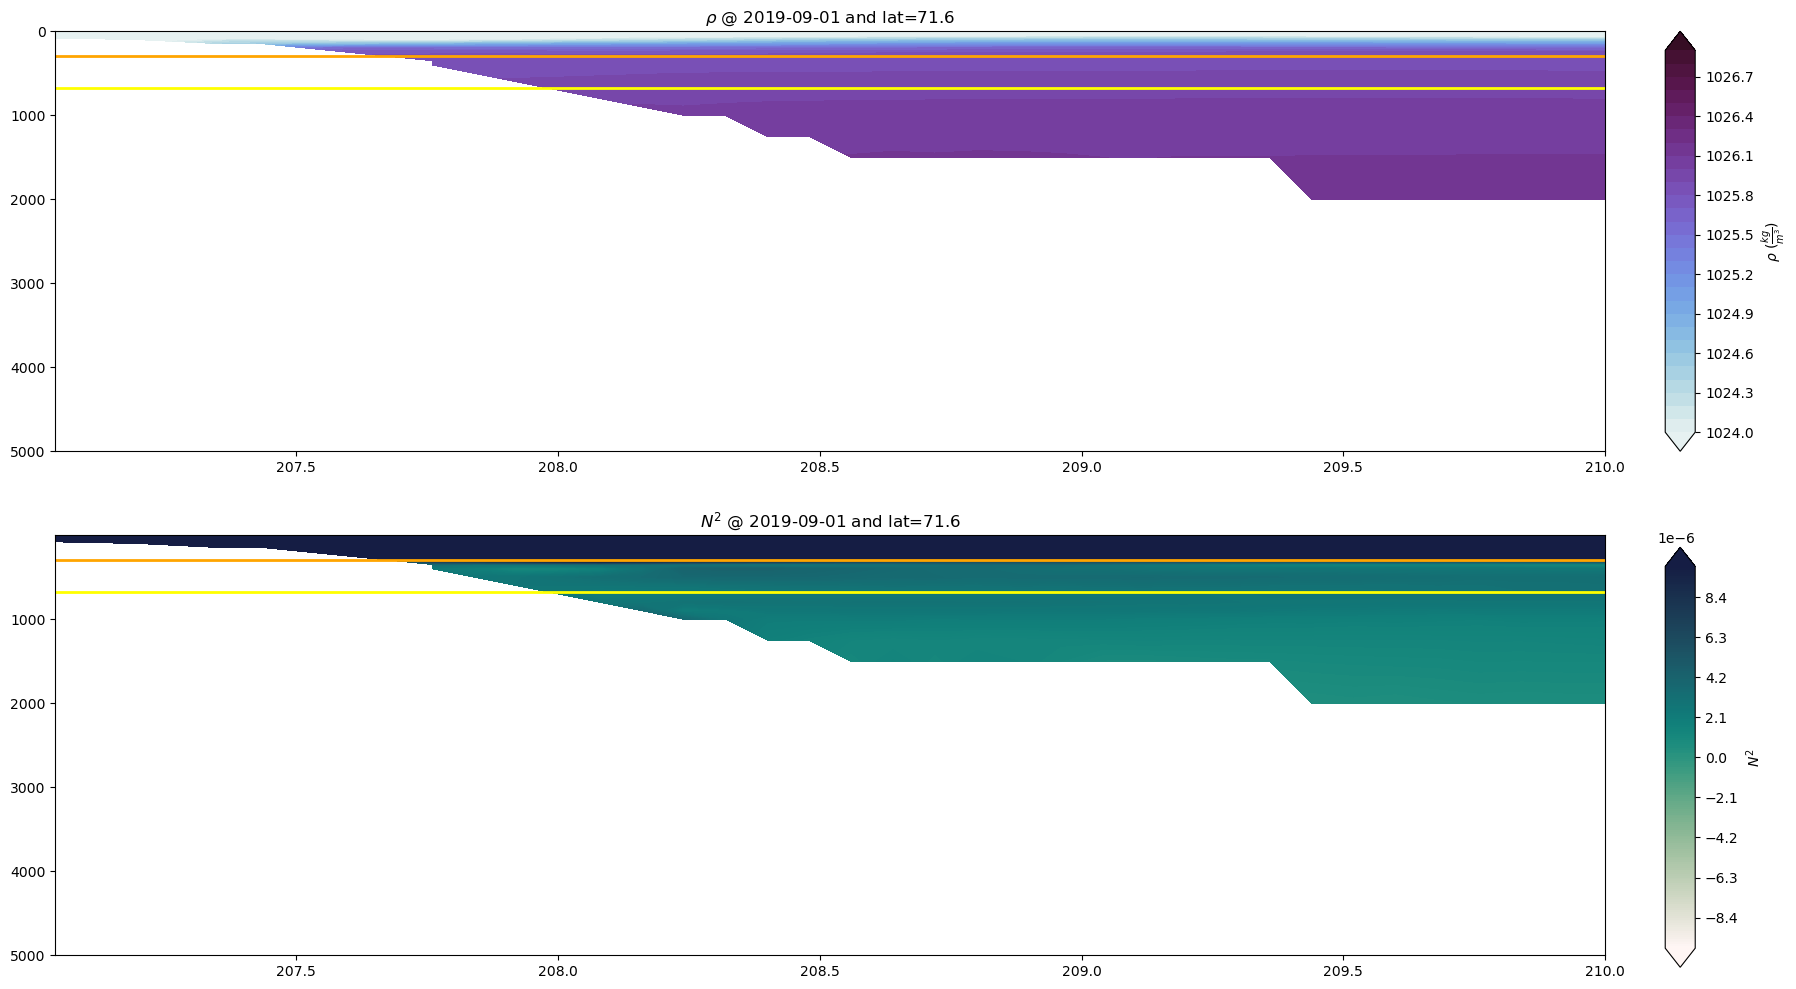

In [39]:
# Plot buoyancy cross-section

# Plot a vertical transect
fig, ax = plt.subplots(2, 1, figsize=(20,12))

# Density levels
rho_min = 1024 # 
rho_max = 1027 # 
lev_rho = np.arange(rho_min, rho_max, 0.1)

# N2 levels
N2_min = -0.00001 # 
N2_max = 0.00001 # 
lev_N2 = np.arange(N2_min, N2_max, 0.0000001)

# Plot density cross-section
cs1 = ax[0].contourf(reg1_rho.lon, reg1_rho.depth, reg1_rho.sel(time='2019-09-01 00:00:00', lat=71.6, method='nearest')[:,:],
                     cmap=cmo.dense, vmin=rho_min, vmax=rho_max, levels=lev_rho, extend='both')
ax[0].set_title(r'$\rho$ @ 2019-09-01 and lat=71.6', rotation=0)
cbar_ax1 = fig.add_axes([0.93,0.53,0.015,0.35])
fig.colorbar(cs1,ax=ax[0],extend='both',
             label=r'$\rho$ ($\frac{kg}{m^{3}}$)',
             pad=0.03, cax=cbar_ax1)
ax[0].axhline(y=672, color='yellow', linewidth=2)
ax[0].axhline(y=300, color='orange', linewidth=2)

# Plot N2 cross-section 
cs2 = ax[1].contourf(N2_reg1.lon, N2_reg1.depth, N2_reg1.sel(time='2019-09-01 00:00:00', lat=71.6, method='nearest')[:,:],
                     cmap=cmo.tempo, vmin=N2_min, vmax=N2_max, levels=lev_N2, extend='both')
ax[1].set_title(r'$N^{2}$ @ 2019-09-01 and lat=71.6', rotation=0)
ax[1].axhline(y=672, color='yellow', linewidth=2)
ax[1].axhline(y=300, color='orange', linewidth=2)

#ax.set_ylim(0,200)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

# for r in range(4):
#     ax[r].set_ylim(0,200)
#     ax[r].invert_yaxis()

cbar_ax2 = fig.add_axes([0.93,0.1,0.015,0.35])
fig.colorbar(cs2,ax=ax[1],extend='both',
             label=r'$N^{2}$',
             pad=0.03, cax=cbar_ax2)


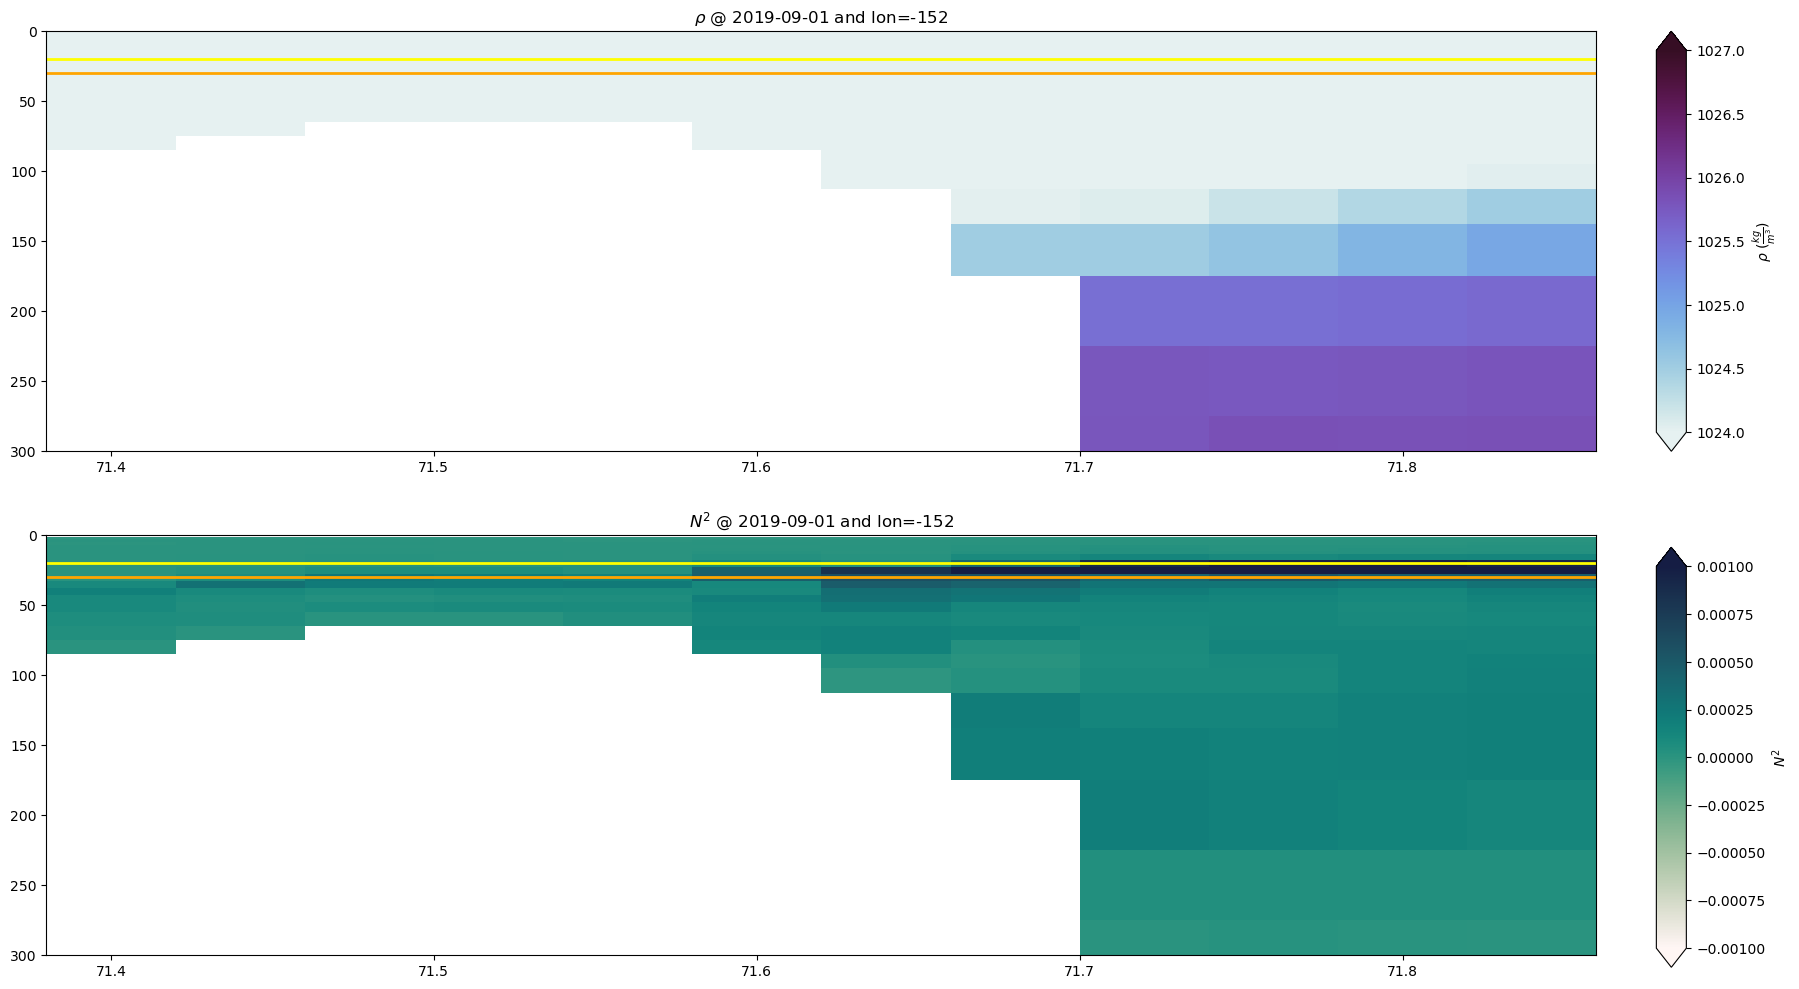

In [40]:
# Plot a vertical transect
fig, ax = plt.subplots(2, 1, figsize=(20,12))

# Density levels
rho_min = 1024 # 
rho_max = 1027 # 
lev_rho = np.arange(rho_min, rho_max, 0.1)

# N2 levels
N2_min = -0.001 # 
N2_max = 0.001 # 
lev_N2 = np.arange(N2_min, N2_max, 0.0001)

# Plot density cross-section
#cs1 = ax[0].contourf(reg1_rho.lat, reg1_rho.depth, reg1_rho.sel(time='2019-09-01 00:00:00', lon=-152, method='nearest')[:,:],
 #                    cmap=cmo.dense, vmin=rho_min, vmax=rho_max, levels=lev_rho, extend='both')
cs1 = ax[0].pcolormesh(reg1_rho.lat, reg1_rho.depth, reg1_rho.sel(time='2019-09-01 00:00:00', lon=-152, method='nearest')[:,:],
                     cmap=cmo.dense, vmin=rho_min, vmax=rho_max)
ax[0].set_title(r'$\rho$ @ 2019-09-01 and lon=-152', rotation=0)
cbar_ax1 = fig.add_axes([0.93,0.53,0.015,0.35])
fig.colorbar(cs1,ax=ax[0],extend='both',
             label=r'$\rho$ ($\frac{kg}{m^{3}}$)',
             pad=0.03, cax=cbar_ax1)
ax[0].axhline(y=20, color='yellow', linewidth=2)
ax[0].axhline(y=30, color='orange', linewidth=2)

# Plot N2 cross-section 
#cs2 = ax[1].contourf(N2_reg1.lat, N2_reg1.depth, N2_reg1.sel(time='2019-09-01 00:00:00', lon=-152, method='nearest')[:,:],
 #                    cmap=cmo.tempo, vmin=N2_min, vmax=N2_max, levels=lev_N2, extend='both')
cs2 = ax[1].pcolormesh(N2_reg1.lat, N2_reg1.depth, N2_reg1.sel(time='2019-09-01 00:00:00', lon=-152, method='nearest')[:,:],
                     cmap=cmo.tempo, vmin=N2_min, vmax=N2_max)
ax[1].set_title(r'$N^{2}$ @ 2019-09-01 and lon=-152', rotation=0)
ax[1].axhline(y=20, color='yellow', linewidth=2)
ax[1].axhline(y=30, color='orange', linewidth=2)

#ax.set_ylim(0,200)
ax[0].set_ylim(0,300)
ax[1].set_ylim(0,300)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

# for r in range(4):
#     ax[r].set_ylim(0,200)
#     ax[r].invert_yaxis()

cbar_ax2 = fig.add_axes([0.93,0.1,0.015,0.35])
fig.colorbar(cs2,ax=ax[1],extend='both',
             label=r'$N^{2}$',
             pad=0.03, cax=cbar_ax2)

In [41]:
# Now find and plot N2, then plot combined version
# Leaving this calculation here but I think the pynoclcine
# depth should be pulled out visually from the above plots 

# Box 1
# print the shape
print('N2_reg1 shape: ', np.shape(N2_reg1))
# Find the pycnocline depth using code from Dylan
N2_reg1_max = N2_reg1.max()
threshold_reg1 = 0.2 * N2_reg1_max  # 20% of maximum
N2_reg1_pycno = N2_reg1.where(N2_reg1 > threshold_reg1)
#N2_pycno = N2[pyc_mask]  # can take mean or first/last depth
mean_pycnocline_depth_reg1 = np.mean(N2_reg1_pycno.depth)
print('mean pycno_depth: ', mean_pycnocline_depth_reg1.values)
top_pycnocline_depth_reg1 = (N2_reg1_pycno.depth[0])
print('top pycno_depth: ', top_pycnocline_depth_reg1.values)
bottom_pycnocline_depth_reg1 = (N2_reg1_pycno.depth[-1])
print('bottom pycno_depth: ', bottom_pycnocline_depth_reg1.values)

# Box 2
# print the shape
print('N2_reg2 shape: ', np.shape(N2_reg2))
# Find the pycnocline depth using code from Dylan
N2_reg2_max = N2_reg2.max()
threshold_reg2 = 0.2 * N2_reg2_max  # 20% of maximum
N2_reg2_pycno = N2_reg2.where(N2_reg2 > threshold_reg2)
#N2_pycno = N2[pyc_mask]  # can take mean or first/last depth
mean_pycnocline_depth_reg2 = np.mean(N2_reg2_pycno.depth)
print('mean pycno_depth: ', mean_pycnocline_depth_reg2.values)
top_pycnocline_depth_reg2 = (N2_reg2_pycno.depth[0])
print('top pycno_depth: ', top_pycnocline_depth_reg2.values)
bottom_pycnocline_depth_reg2 = (N2_reg2_pycno.depth[-1])
print('bottom pycno_depth: ', bottom_pycnocline_depth_reg2.values)

N2_reg1 shape:  (2075, 39, 12, 38)
mean pycno_depth:  672.4871794871794
top pycno_depth:  2.0
bottom pycno_depth:  5000.0
N2_reg2 shape:  (2075, 39, 12, 25)
mean pycno_depth:  672.4871794871794
top pycno_depth:  2.0
bottom pycno_depth:  5000.0


In [42]:
salt_reg1.depth

<xarray.DataArray 'depth' (depth: 40)> Size: 320B
array([0.00e+00, 2.00e+00, 4.00e+00, 6.00e+00, 8.00e+00, 1.00e+01, 1.20e+01,
       1.50e+01, 2.00e+01, 2.50e+01, 3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01,
       5.00e+01, 6.00e+01, 7.00e+01, 8.00e+01, 9.00e+01, 1.00e+02, 1.25e+02,
       1.50e+02, 2.00e+02, 2.50e+02, 3.00e+02, 3.50e+02, 4.00e+02, 5.00e+02,
       6.00e+02, 7.00e+02, 8.00e+02, 9.00e+02, 1.00e+03, 1.25e+03, 1.50e+03,
       2.00e+03, 2.50e+03, 3.00e+03, 4.00e+03, 5.00e+03])
Coordinates:
  * depth    (depth) float64 320B 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
Attributes:
    standard_name:           depth
    long_name:               Depth
    units:                   m
    positive:                down
    axis:                    Z
    NAVO_code:               5
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

In [43]:
# For now, interpolate onto mean depth, then plot 
# (and volume-weighting will be weird once we 
# interpolate to a certain depth soooooo come back to that later)
# Set the pycnocline depth according toe the plot
z_pycno = 50 # meters; 670

print('HYCOM depth: ', salt_reg1.depth[14].values)

# Find the nearest HYCOM depth...

# Trim N2 to just the values from the surface to this pycnocline depth
N2_reg1_in_pycno = N2_reg1[:,:14,:,:]
N2_reg2_in_pycno = N2_reg2[:,:14,:,:]

HYCOM depth:  50.0


In [44]:
# Print some stats
# Box 1
print('N2_reg1_in_pycno')
print('N2_reg1_in_pycno min: ', N2_reg1_in_pycno.min().values)
print('N2_reg1_in_pycno max: ', N2_reg1_in_pycno.max().values)
print('N2_reg1_in_pycno mean: ', N2_reg1_in_pycno.mean().values)
print('N2_reg1_in_pycno std: ', N2_reg1_in_pycno.std().values)

# Box 2
print('N2_reg2_in_pycno')
print('N2_reg2_in_pycno min: ', N2_reg2_in_pycno.min().values)
print('N2_reg2_in_pycno max: ', N2_reg2_in_pycno.max().values)
print('N2_reg2_in_pycno mean: ', N2_reg2_in_pycno.mean().values)
print('N2_reg2_in_pycno std: ', N2_reg2_in_pycno.std().values)

N2_reg1_in_pycno
N2_reg1_in_pycno min:  -0.0027937922478679413
N2_reg1_in_pycno max:  0.007095329093456115
N2_reg1_in_pycno mean:  0.00016326551315916642
N2_reg1_in_pycno std:  0.0003300010678811683
N2_reg2_in_pycno
N2_reg2_in_pycno min:  -0.0028854567087651696
N2_reg2_in_pycno max:  0.007095329093456115
N2_reg2_in_pycno mean:  0.0001709203614370695
N2_reg2_in_pycno std:  0.0003680182502582102


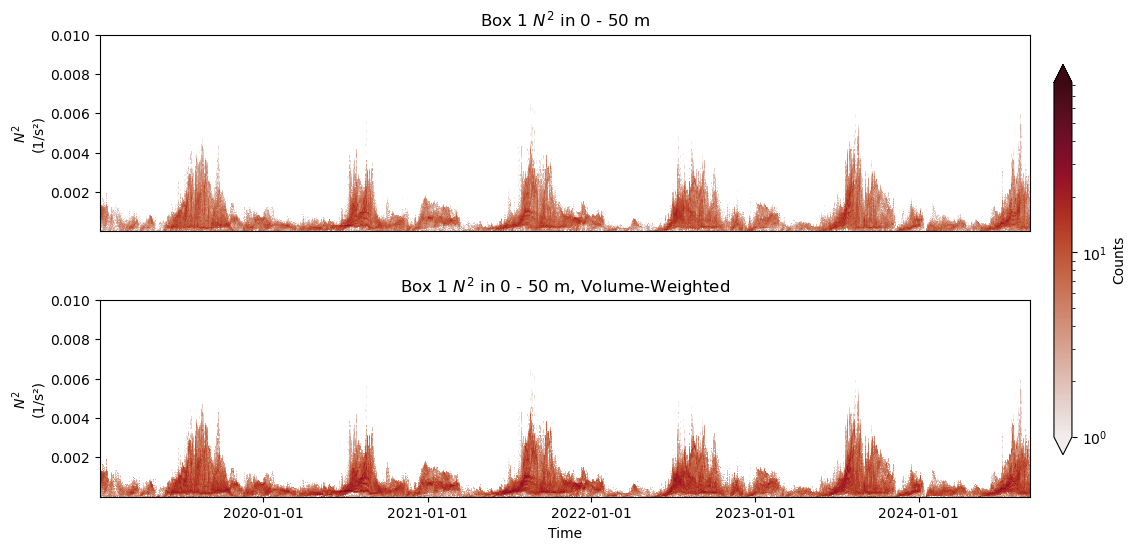

In [45]:
# Get volumes for top n m of depths (whatever is closest HYCOM 
# depth to the pycnocline depth) - Box 1
cell_vol_700m_reg1 = dz_reg1[:29]*dy_reg1*dx_reg1
cell_vol_30m_reg1 = dz_reg1[:10]*dy_reg1*dx_reg1
cell_vol_50m_reg1 = dz_reg1[:14]*dy_reg1*dx_reg1

# Calculate histograms both with and without weighted by volume 

# Prep the data
# Flatten N2 in pycno
N2_reg1_in_pycno = N2_reg1_in_pycno[:,:,1:,1:] # because it has different shape than volumes since differences were not taken laterally (no dx, dy in calculation)
N2_reg1_in_pycno_stack = N2_reg1_in_pycno.stack(points=('depth','lat', 'lon'))
N2_reg1_in_pycno_flat = N2_reg1_in_pycno_stack.values.flatten()

# Flatten the volumes
cell_vol_pycno_reg1 = cell_vol_50m_reg1
vol_broadcast_pycno_reg1 = cell_vol_pycno_reg1.expand_dims(time=M2_reg2_surf.time)
vol_stack_pycno_reg1 = vol_broadcast_pycno_reg1.stack(points=('lat','lon'))
vol_flat_pycno_reg1 = vol_stack_pycno_reg1.values.flatten()

# Convert xarray time to matplotlib numbers
times_num_N2_in_pycno_reg1 = mdates.date2num(N2_reg1_in_pycno_stack.time.values.astype("datetime64[ms]"))

# Repeat each time for all spatial points
time_flat_N2_in_pycno_reg1 = np.repeat(times_num_N2_in_pycno_reg1, N2_reg1_in_pycno_stack.sizes["points"])

# Define M2 and time bins
n_data_bins = 400
data_bins_N2_in_pycno_reg1 = np.logspace(-7, -2, 400) # (-10, -2, 400), (-10, -2, 400)
#data_bins_N2_in_pycno_reg1 = np.linspace(np.nanmin(N2_reg1_in_pycno_flat), np.nanmax(N2_reg1_in_pycno_flat), n_data_bins)
dt_N2_in_pycno_reg1 = times_num_N2_in_pycno_reg1[1] - times_num_N2_in_pycno_reg1[0]   # time bin = one time step
time_bins_N2_in_pycno_reg1 = np.arange(times_num_N2_in_pycno_reg1.min(), times_num_N2_in_pycno_reg1.max() + dt_N2_in_pycno_reg1, dt_N2_in_pycno_reg1)

# Get the info for the 2D histogram
H_N2_in_pycno_reg1, xedges_N2_in_pycno_reg1, yedges_N2_in_pycno_reg1 = np.histogram2d(time_flat_N2_in_pycno_reg1, N2_reg1_in_pycno_flat, bins=[time_bins_N2_in_pycno_reg1, data_bins_N2_in_pycno_reg1])
H_N2_in_pycno_weight_reg1, xedges_N2_in_pycno_weight_reg1, yedges_N2_in_pycno_weight_reg1 = np.histogram2d(time_flat_N2_in_pycno_reg1, N2_reg1_in_pycno_flat, bins=[time_bins_N2_in_pycno_reg1, data_bins_N2_in_pycno_reg1], weights=vol_flat_pycno_reg1)

# Now plot this as a figure
# Do a few versions with different ranges
# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Set the meshes
X_N2_in_pycno_reg1, Y_N2_in_pycno_reg1 = np.meshgrid(xedges_N2_in_pycno_reg1, yedges_N2_in_pycno_reg1)
X_N2_in_pycno_weight_reg1, Y_N2_in_pycno_weight_reg1 = np.meshgrid(xedges_N2_in_pycno_weight_reg1, yedges_N2_in_pycno_weight_reg1)

# Set the min/max counts 
min_count = 0
max_count = 30

# Plot the data as pcolormesh
c2 = ax[0].pcolormesh(X_N2_in_pycno_reg1, Y_N2_in_pycno_reg1, H_N2_in_pycno_reg1.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)
c3 = ax[1].pcolormesh(X_N2_in_pycno_weight_reg1, Y_N2_in_pycno_weight_reg1, H_N2_in_pycno_weight_reg1.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

for r in range(2):
    # Label the plot
    ax[r].set_xlabel("Time")
    ax[r].set_ylabel("$N^{2}$ \n(1/s\u00b2)")
    #ax[r].set_title("$N^{2}$")

# Label the axes
ax[0].set_title("Box 1 $N^{2}$ in 0 - 50 m")
ax[1].set_title("Box 1 $N^{2}$ in 0 - 50 m, Volume-Weighted")

# Format time (for last plot)
ax[0].xaxis.set_visible(False)
#ax[2].xaxis.set_visible(False)
ax[1].xaxis_date()
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.18,0.015,0.65])
fig.colorbar(c1,ax=ax[1],extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)

plt.subplots_adjust(hspace=0.35)

plt.show()


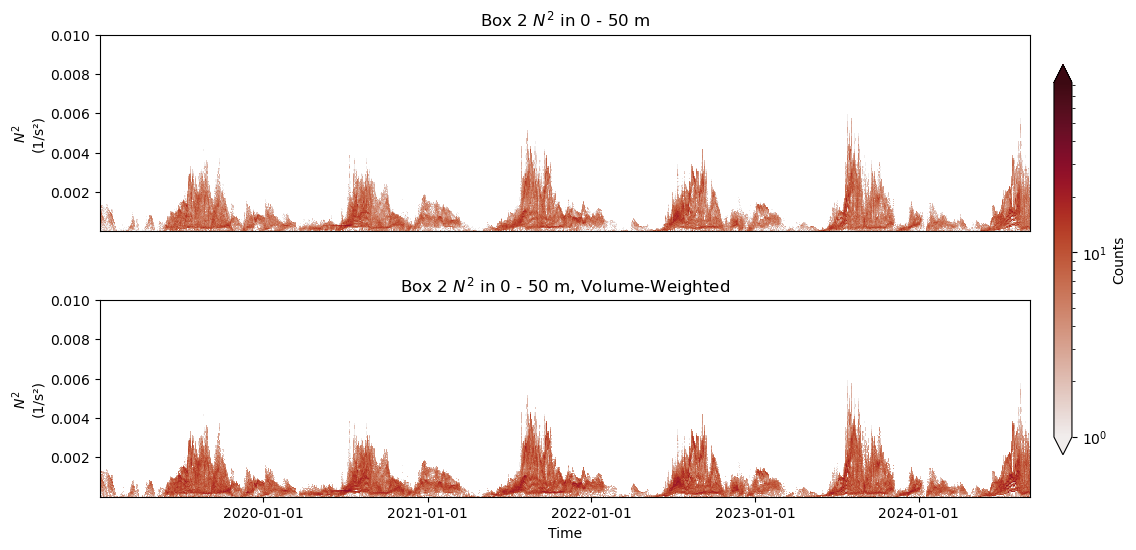

In [46]:
# Get volumes for top n m of depths (whatever is closest HYCOM 
# depth to the pycnocline depth) - Box 2
cell_vol_700m_reg2 = dz_reg2[:29]*dy_reg2*dx_reg2
cell_vol_30m_reg2 = dz_reg2[:10]*dy_reg2*dx_reg2
cell_vol_50m_reg2 = dz_reg2[:14]*dy_reg2*dx_reg2

# Calculate histograms both with and without weighted by volume 

# Prep the data
# Flatten N2 in pycno
N2_reg2_in_pycno = N2_reg2_in_pycno[:,:,1:,1:] # because it has different shape than volumes since differences were not taken laterally (no dx, dy in calculation)
N2_reg2_in_pycno_stack = N2_reg2_in_pycno.stack(points=('depth','lat', 'lon'))
N2_reg2_in_pycno_flat = N2_reg2_in_pycno_stack.values.flatten()

# Flatten the volumes
cell_vol_pycno_reg2 = cell_vol_50m_reg2
vol_broadcast_pycno_reg2 = cell_vol_pycno_reg2.expand_dims(time=M2_reg2_surf.time)
vol_stack_pycno_reg2 = vol_broadcast_pycno_reg2.stack(points=('lat','lon'))
vol_flat_pycno_reg2 = vol_stack_pycno_reg2.values.flatten()

# Convert xarray time to matplotlib numbers
times_num_N2_in_pycno_reg2 = mdates.date2num(N2_reg2_in_pycno_stack.time.values.astype("datetime64[ms]"))

# Repeat each time for all spatial points
time_flat_N2_in_pycno_reg2 = np.repeat(times_num_N2_in_pycno_reg2, N2_reg2_in_pycno_stack.sizes["points"])

# Define M2 and time bins
n_data_bins = 400
data_bins_N2_in_pycno_reg2 = np.logspace(-7, -2, 400)
#data_bins_N2_in_pycno_reg2 = np.linspace(np.nanmin(N2_reg2_in_pycno_flat), np.nanmax(N2_reg2_in_pycno_flat), n_data_bins)
dt_N2_in_pycno_reg2 = times_num_N2_in_pycno_reg2[1] - times_num_N2_in_pycno_reg2[0]   # time bin = one time step
time_bins_N2_in_pycno_reg2 = np.arange(times_num_N2_in_pycno_reg2.min(), times_num_N2_in_pycno_reg2.max() + dt_N2_in_pycno_reg2, dt_N2_in_pycno_reg2)

# Get the info for the 2D histogram
H_N2_in_pycno_reg2, xedges_N2_in_pycno_reg2, yedges_N2_in_pycno_reg2 = np.histogram2d(time_flat_N2_in_pycno_reg2, N2_reg2_in_pycno_flat, bins=[time_bins_N2_in_pycno_reg2, data_bins_N2_in_pycno_reg2])
H_N2_in_pycno_weight_reg2, xedges_N2_in_pycno_weight_reg2, yedges_N2_in_pycno_weight_reg2 = np.histogram2d(time_flat_N2_in_pycno_reg2, N2_reg2_in_pycno_flat, bins=[time_bins_N2_in_pycno_reg2, data_bins_N2_in_pycno_reg2], weights=vol_flat_pycno_reg2)
#H_N2_in_pycno_weight_reg2, xedges_N2_in_pycno_weight_reg2, yedges_N2_in_pycno_weight_reg2 = np.histogram2d(time_flat_N2_in_pycno_reg2, N2_reg2_in_pycno_flat, bins=[time_bins_N2_in_pycno_reg2, data_bins_N2_in_pycno_reg2], weights=vol_flat_pycno_reg2, density=True)

# Now plot this as a figure
# Do a few versions with different ranges
# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Set the meshes
X_N2_in_pycno_reg2, Y_N2_in_pycno_reg2 = np.meshgrid(xedges_N2_in_pycno_reg2, yedges_N2_in_pycno_reg2)
X_N2_in_pycno_weight_reg2, Y_N2_in_pycno_weight_reg2 = np.meshgrid(xedges_N2_in_pycno_weight_reg2, yedges_N2_in_pycno_weight_reg2)

# Set the min/max counts 
min_count = 2
max_count = 30

# Plot the data as pcolormesh
c2 = ax[0].pcolormesh(X_N2_in_pycno_reg2, Y_N2_in_pycno_reg2, H_N2_in_pycno_reg2.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)
c3 = ax[1].pcolormesh(X_N2_in_pycno_weight_reg2, Y_N2_in_pycno_weight_reg2, H_N2_in_pycno_weight_reg2.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

for r in range(2):
    # Label the plot
    ax[r].set_xlabel("Time")
    ax[r].set_ylabel("$N^{2}$ \n(1/s\u00b2)")
    #ax[r].set_title("$N^{2}$")

# Label the axes
ax[0].set_title("Box 2 $N^{2}$ in 0 - 50 m")
ax[1].set_title("Box 2 $N^{2}$ in 0 - 50 m, Volume-Weighted")

# Format time (for last plot)
ax[0].xaxis.set_visible(False)
#ax[2].xaxis.set_visible(False)
ax[1].xaxis_date()
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.18,0.015,0.65])
fig.colorbar(c1,ax=ax[1],extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)

plt.subplots_adjust(hspace=0.35)

plt.show()

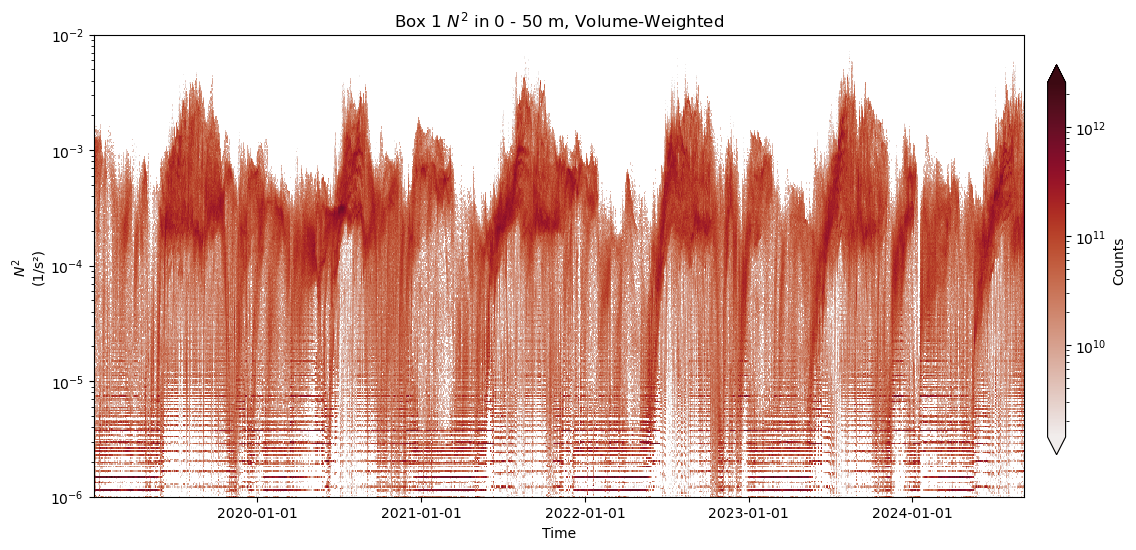

In [47]:
# Plot this on a log scale - Box 1 weighted
# yedges must be strictly positive
# In pycnocline depth
mask_N2_in_pycno_reg1 = yedges_N2_in_pycno_weight_reg1 > 0
yedges_N2_in_pycno_weight_pos_reg1 = yedges_N2_in_pycno_weight_reg1[mask_N2_in_pycno_reg1]
H_pos_N2_in_pycno_weight_reg1 = H_N2_in_pycno_weight_reg1[:, mask_N2_in_pycno_reg1[:-1]]  # match bin count to edges

# Make the figure 
fig, ax = plt.subplots(figsize=(12, 6))

# Set the meshes
X_N2_in_pycno_weight_reg1, Y_N2_in_pycno_weight_pos_reg1 = np.meshgrid(xedges_N2_in_pycno_weight_reg1, yedges_N2_in_pycno_weight_pos_reg1)

# Set the min/max counts 
#min_count = 0
#max_count = 10000000

# Plot the data as pcolormesh
c2 = ax.pcolormesh(X_N2_in_pycno_weight_reg1, Y_N2_in_pycno_weight_pos_reg1, H_pos_N2_in_pycno_weight_reg1.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

# Label the plot
ax.set_xlabel("Time")
ax.set_ylabel("$N^{2}$ \n(1/s\u00b2)")
#ax.set_title("$N^{2}$")
ax.set_yscale('log')
#ax.set_ylim(10e-7, 10e-2)

# Label the subplots
ax.set_title("Box 1 $N^{2}$ in 0 - 50 m, Volume-Weighted")

# Set different y limits
ax.set_ylim(10e-7, 10e-3)

# Format time (for last plot)
#ax[1].xaxis.set_visible(False)
#ax[2].xaxis.set_visible(False)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.18,0.015,0.65])
fig.colorbar(c2,ax=ax,extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)

plt.subplots_adjust(hspace=0.35)

plt.show()


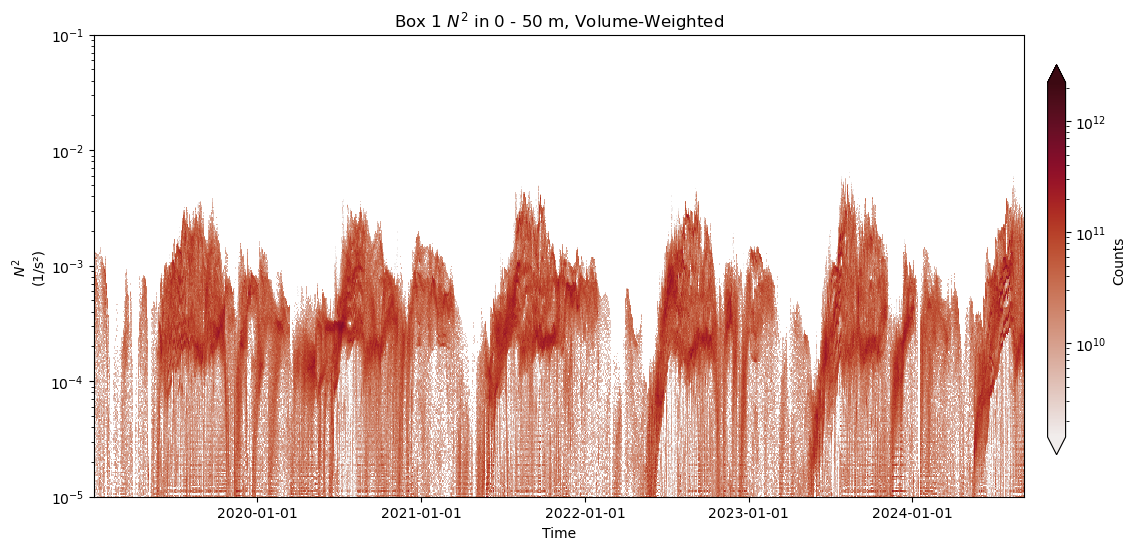

In [48]:
# Plot this on a log scale - Box 2 weighted
# yedges must be strictly positive
# In pycnocline depth
mask_N2_in_pycno_reg2 = yedges_N2_in_pycno_weight_reg2 > 0
yedges_N2_in_pycno_weight_pos_reg2 = yedges_N2_in_pycno_weight_reg2[mask_N2_in_pycno_reg2]
H_pos_N2_in_pycno_weight_reg2 = H_N2_in_pycno_weight_reg2[:, mask_N2_in_pycno_reg2[:-1]]  # match bin count to edges

# Make the figure 
fig, ax = plt.subplots(figsize=(12, 6))

# Set the meshes
X_N2_in_pycno_weight_reg2, Y_N2_in_pycno_weight_pos_reg2 = np.meshgrid(xedges_N2_in_pycno_weight_reg2, yedges_N2_in_pycno_weight_pos_reg2)

# Set the min/max counts 
#min_count = 0
#max_count = 10000000

# Plot the data as pcolormesh
c2 = ax.pcolormesh(X_N2_in_pycno_weight_reg2, Y_N2_in_pycno_weight_pos_reg2, H_pos_N2_in_pycno_weight_reg2.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

# Label the plot
ax.set_xlabel("Time")
ax.set_ylabel("$N^{2}$ \n(1/s\u00b2)")
#ax.set_title("$N^{2}$")
ax.set_yscale('log')
#ax.set_ylim(10e-7, 10e-2)

# Label the subplots
ax.set_title("Box 1 $N^{2}$ in 0 - 50 m, Volume-Weighted")

# Set different y limits
ax.set_ylim(10e-6, 10e-2)

# Format time (for last plot)
#ax[1].xaxis.set_visible(False)
#ax[2].xaxis.set_visible(False)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.18,0.015,0.65])
fig.colorbar(c2,ax=ax,extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)

plt.subplots_adjust(hspace=0.35)

plt.show()

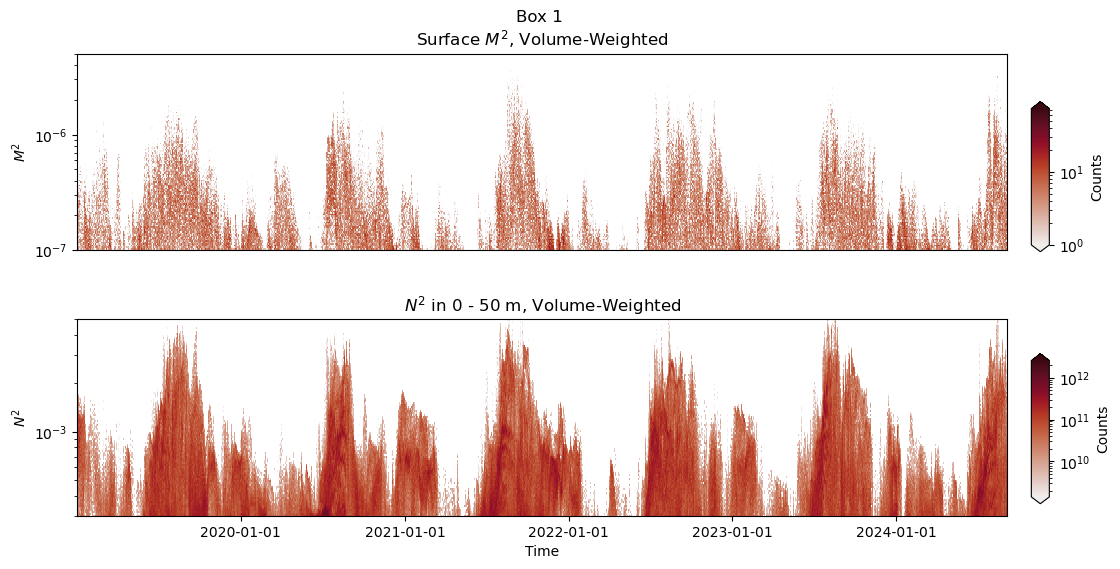

In [49]:
# Okayyyyy make some combined version of these plots...
# Do log scale and volume-weighted 

# Region 1

# Make the figure
# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Set the min/max counts 
min_count = 0
max_count1 = 100
max_count2 = 1e12

# Plot the data as pcolormesh
# M2 (at surface, weighted by volume)
c1 = ax[0].pcolormesh(X_vol_weight_reg1, Y_vol_weight_reg1, H_pos_vol_weight_reg1.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)
# N2 (in 0 - 30 m, no weighting by volume)
c2 = ax[1].pcolormesh(X_N2_in_pycno_weight_reg1, Y_N2_in_pycno_weight_pos_reg1, H_pos_N2_in_pycno_weight_reg1.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

for r in range(2):
    # Label the plot
    ax[r].set_xlabel("Time")
    #ax[r].set_title("$N^{2}$")
    ax[r].set_yscale('log')
    #ax[r].set_ylim(10e-7, 10e-2)

# Label the subplots
ax[0].set_title("Box 1 \nSurface $M^{2}$, Volume-Weighted")
ax[0].set_ylabel("$M^{2}$")
ax[1].set_title("$N^{2}$ in 0 - 50 m, Volume-Weighted")
ax[1].set_ylabel("$N^{2}$")

# Set different y limits
ax[0].set_ylim(1e-7, 5*1e-6) # (10e-8, 10e-6)
ax[1].set_ylim(3*1e-4, 5*1e-3) # (10e-6, 10e-3)

# Format time (for last plot)
ax[0].xaxis.set_visible(False)
#ax[1].xaxis.set_visible(False)
#ax[2].xaxis.set_visible(False)
ax[1].xaxis_date()
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.55,0.015,0.25])
fig.colorbar(c1,ax=ax[0],extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)
cbar_ax2 = fig.add_axes([0.92,0.13,0.015,0.25])
fig.colorbar(c2,ax=ax[1],extend='both', label='Counts',
             pad=0.03, cax=cbar_ax2)

plt.subplots_adjust(hspace=0.35)

plt.show()



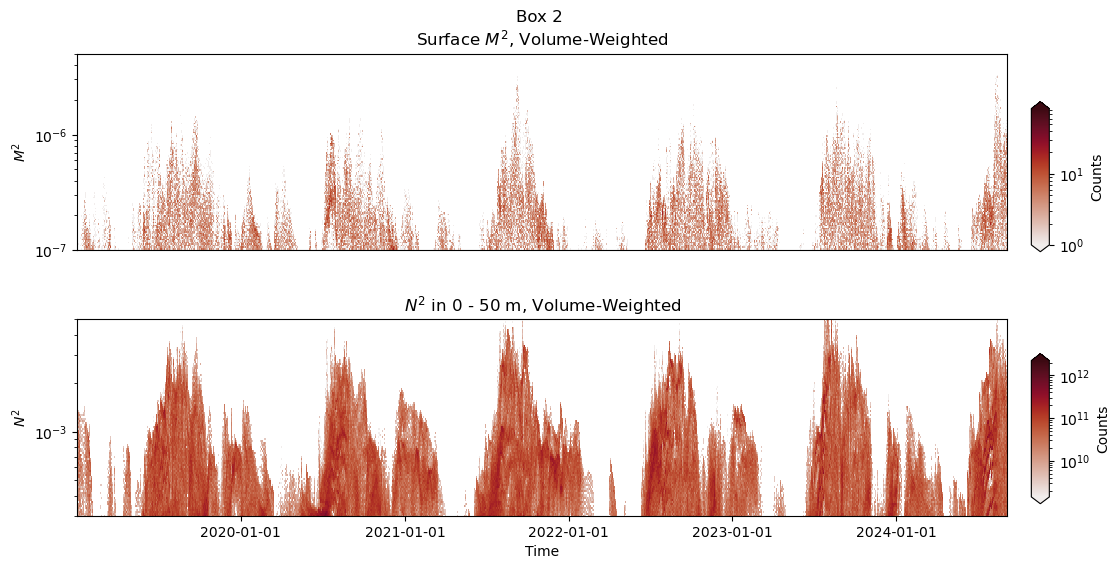

In [50]:
# Okayyyyy make some combined version of these plots...
# Do log scale and volume-weighted 

# Region 2

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Set the min/max counts 
min_count = 0
max_count1 = 100
max_count2 = 1e12

# Plot the data as pcolormesh
# M2 (at surface, weighted by volume)
c1 = ax[0].pcolormesh(X_vol_weight_reg2, Y_vol_weight_reg2, H_pos_vol_weight_reg2.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)
# N2 (in 0 - 30 m, no weighting by volume)
c2 = ax[1].pcolormesh(X_N2_in_pycno_weight_reg2, Y_N2_in_pycno_weight_pos_reg2, H_pos_N2_in_pycno_weight_reg2.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

for r in range(2):
    # Label the plot
    ax[r].set_xlabel("Time")
    #ax[r].set_title("$N^{2}$")
    ax[r].set_yscale('log')
    #ax[r].set_ylim(10e-7, 10e-2)

# Label the subplots
ax[0].set_title("Box 2 \nSurface $M^{2}$, Volume-Weighted")
ax[0].set_ylabel("$M^{2}$")
ax[1].set_title("$N^{2}$ in 0 - 50 m, Volume-Weighted")
ax[1].set_ylabel("$N^{2}$")

# Set different y limits
ax[0].set_ylim(1e-7, 5*1e-6) # (10e-8, 10e-6)
ax[1].set_ylim(3*1e-4, 5*1e-3) # (10e-6, 10e-3)

# Format time (for last plot)
ax[0].xaxis.set_visible(False)
#ax[1].xaxis.set_visible(False)
#ax[2].xaxis.set_visible(False)
ax[1].xaxis_date()
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.55,0.015,0.25])
fig.colorbar(c1,ax=ax[0],extend='both', label='Counts',
             pad=0.03, cax=cbar_ax1)
cbar_ax2 = fig.add_axes([0.92,0.13,0.015,0.25])
fig.colorbar(c2,ax=ax[1],extend='both', label='Counts',
             pad=0.03, cax=cbar_ax2)

plt.subplots_adjust(hspace=0.35)

plt.show()

In [51]:
# Make another version of these plots with 
# density=True so we get PDFs instead of counts 

# ---- M2 ----
# Box 1
# Recalculate the 2D histogram
H_vol_weight_reg1_pdf, xedges_vol_weight_reg1_pdf, yedges_vol_weight_reg1_pdf = np.histogram2d(time_flat_reg1, M2_reg1_surf_flat,
                                                                     bins=[time_bins_reg1, data_bins_all_reg1],
                                                                    weights=vol_flat_reg1, density=True)


# Box 2
# Recalculate the 2D histogram
H_vol_weight_reg2_pdf, xedges_vol_weight_reg2_pdf, yedges_vol_weight_reg2_pdf = np.histogram2d(time_flat_reg2, M2_reg2_surf_flat,
                                                                     bins=[time_bins_reg2, data_bins_all_reg2],
                                                                    weights=vol_flat_reg2, density=True)

# ---- LOG SCALE REQUIREMENTS ----
# yedges must be strictly positive
mask_reg1_pdf = yedges_vol_weight_reg2_pdf > 0
yedges_yedges_vol_weight_reg1_pdf_pos = yedges_vol_weight_reg1_pdf[mask_reg1_pdf]
H_pos_vol_weight_reg1_pdf = H_vol_weight_reg1_pdf[:, mask_reg1_pdf[:-1]]  # match bin count to edges

# ---- LOG SCALE REQUIREMENTS ----
# yedges must be strictly positive
mask_vol_weight_reg2_pdf = yedges_vol_weight_reg2_pdf > 0
yedges_vol_weight_pos_reg2_pdf = yedges_vol_weight_reg2_pdf[mask_vol_weight_reg2_pdf]
H_pos_vol_weight_reg2_pdf = H_vol_weight_reg2_pdf[:, mask_vol_weight_reg2_pdf[:-1]]  # match bin count to edges




In [52]:
# Redo histogram for N2
# ---- N2 ----
H_N2_in_pycno_weight_reg1_pdf, xedges_N2_in_pycno_weight_reg1_pdf, yedges_N2_in_pycno_weight_reg1_pdf = np.histogram2d(time_flat_N2_in_pycno_reg1, N2_reg1_in_pycno_flat, bins=[time_bins_N2_in_pycno_reg1, data_bins_N2_in_pycno_reg1], weights=vol_flat_pycno_reg1, density=True)
H_N2_in_pycno_weight_reg2_pdf, xedges_N2_in_pycno_weight_reg2_pdf, yedges_N2_in_pycno_weight_reg2_pdf = np.histogram2d(time_flat_N2_in_pycno_reg2, N2_reg2_in_pycno_flat, bins=[time_bins_N2_in_pycno_reg2, data_bins_N2_in_pycno_reg2], weights=vol_flat_pycno_reg2, density=True)


# yedges must be strictly positive
# In pycnocline depth
mask_N2_in_pycno_reg1_pdf = yedges_N2_in_pycno_weight_reg1_pdf > 0
yedges_N2_in_pycno_weight_pos_reg1_pdf = yedges_N2_in_pycno_weight_reg1_pdf[mask_N2_in_pycno_reg1_pdf]
H_pos_N2_in_pycno_weight_reg1_pdf = H_N2_in_pycno_weight_reg1_pdf[:, mask_N2_in_pycno_reg1_pdf[:-1]]  # match bin count to edges

# yedges must be strictly positive
# In pycnocline depth
mask_N2_in_pycno_reg2_pdf = yedges_N2_in_pycno_weight_reg2_pdf > 0
yedges_N2_in_pycno_weight_pos_reg2_pdf = yedges_N2_in_pycno_weight_reg2_pdf[mask_N2_in_pycno_reg2_pdf]
H_pos_N2_in_pycno_weight_reg2_pdf = H_N2_in_pycno_weight_reg2_pdf[:, mask_N2_in_pycno_reg2_pdf[:-1]]  # match bin count to edges

In [53]:
# Make combo plot with the PDF versions 


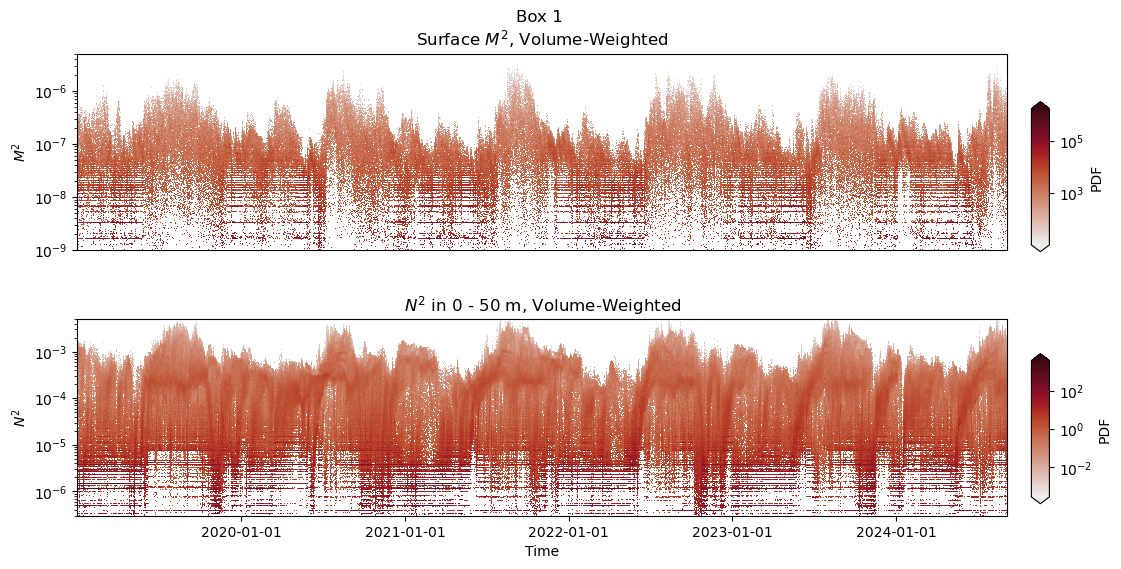

In [54]:
# Okayyyyy make some combined version of these plots...
# Do log scale and volume-weighted 

# Region 1

# Make the figure
# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Set the meshes
X_vol_weight_reg1_pdf, Y_vol_weight_reg1_pdf = np.meshgrid(xedges_vol_weight_reg1_pdf, yedges_yedges_vol_weight_reg1_pdf_pos)
X_N2_in_pycno_weight_reg1_pdf, Y_N2_in_pycno_weight_pos_reg1_pdf = np.meshgrid(xedges_N2_in_pycno_weight_reg1_pdf, yedges_N2_in_pycno_weight_pos_reg1_pdf)

# Plot the data as pcolormesh
# M2 (at surface, weighted by volume)
c1 = ax[0].pcolormesh(X_vol_weight_reg1_pdf, Y_vol_weight_reg1_pdf, H_pos_vol_weight_reg1_pdf.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)
# N2 (in 0 - 30 m, no weighting by volume)
c2 = ax[1].pcolormesh(X_N2_in_pycno_weight_reg1_pdf, Y_N2_in_pycno_weight_pos_reg1_pdf, H_pos_N2_in_pycno_weight_reg1_pdf.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

for r in range(2):
    # Label the plot
    ax[r].set_xlabel("Time")
    #ax[r].set_title("$N^{2}$")
    ax[r].set_yscale('log')
    #ax[r].set_ylim(10e-7, 10e-2)

# Label the subplots
ax[0].set_title("Box 1 \nSurface $M^{2}$, Volume-Weighted")
ax[0].set_ylabel("$M^{2}$")
ax[1].set_title("$N^{2}$ in 0 - 50 m, Volume-Weighted")
ax[1].set_ylabel("$N^{2}$")

# Set different y limits
ax[0].set_ylim(1e-9, 5*1e-6) # (10e-8, 10e-6)
ax[1].set_ylim(3*1e-7, 5*1e-3) # (10e-6, 10e-3)

# Format time (for last plot)
ax[0].xaxis.set_visible(False)
#ax[1].xaxis.set_visible(False)
#ax[2].xaxis.set_visible(False)
ax[1].xaxis_date()
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.55,0.015,0.25])
fig.colorbar(c1,ax=ax[0],extend='both', label='PDF',
             pad=0.03, cax=cbar_ax1)
cbar_ax2 = fig.add_axes([0.92,0.13,0.015,0.25])
fig.colorbar(c2,ax=ax[1],extend='both', label='PDF',
             pad=0.03, cax=cbar_ax2)

plt.subplots_adjust(hspace=0.35)

plt.show()

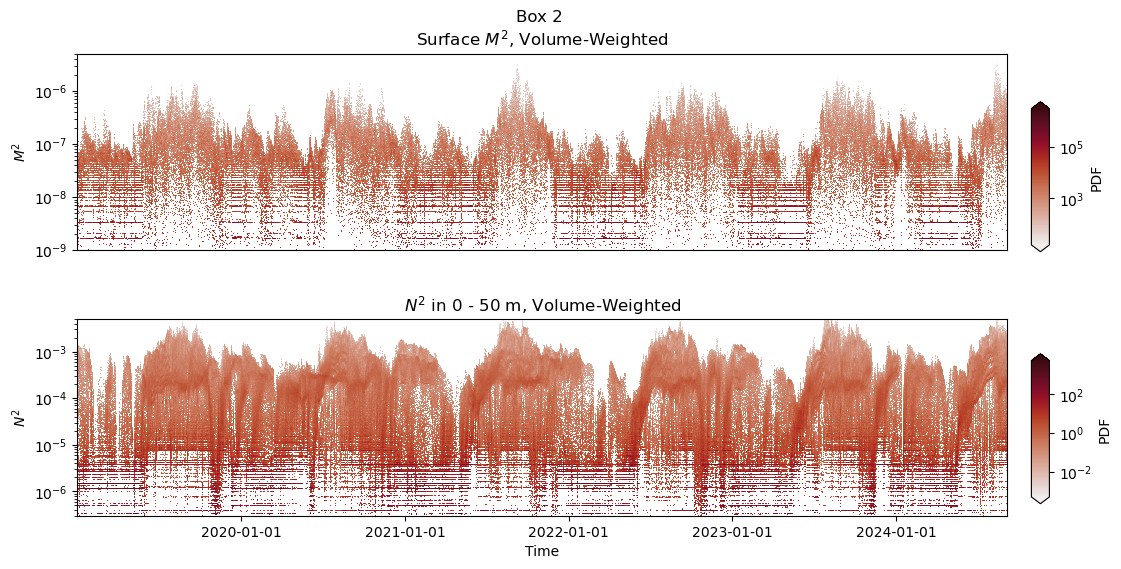

In [55]:
# Okayyyyy make some combined version of these plots...
# Do log scale and volume-weighted 

# Region 2

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Set the meshes
X_vol_weight_reg2_pdf, Y_vol_weight_reg2_pdf = np.meshgrid(xedges_vol_weight_reg2_pdf, yedges_vol_weight_pos_reg2_pdf)
X_N2_in_pycno_weight_reg2_pdf, Y_N2_in_pycno_weight_pos_reg2_pdf = np.meshgrid(xedges_N2_in_pycno_weight_reg2_pdf, yedges_N2_in_pycno_weight_pos_reg2_pdf)

# Plot the data as pcolormesh
# M2 (at surface, weighted by volume)
c1 = ax[0].pcolormesh(X_vol_weight_reg2_pdf, Y_vol_weight_reg2_pdf, H_pos_vol_weight_reg2_pdf.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)
# N2 (in 0 - 30 m, no weighting by volume)
c2 = ax[1].pcolormesh(X_N2_in_pycno_weight_reg2_pdf, Y_N2_in_pycno_weight_pos_reg2_pdf, H_pos_N2_in_pycno_weight_reg2_pdf.T, norm=LogNorm(), shading='auto', cmap=cmo.amp)

for r in range(2):
    # Label the plot
    ax[r].set_xlabel("Time")
    #ax[r].set_title("$N^{2}$")
    ax[r].set_yscale('log')
    #ax[r].set_ylim(10e-7, 10e-2)

# Label the subplots
ax[0].set_title("Box 2 \nSurface $M^{2}$, Volume-Weighted")
ax[0].set_ylabel("$M^{2}$")
ax[1].set_title("$N^{2}$ in 0 - 50 m, Volume-Weighted")
ax[1].set_ylabel("$N^{2}$")

# Set different y limits
ax[0].set_ylim(1e-9, 5*1e-6) # (10e-8, 10e-6)
ax[1].set_ylim(3*1e-7, 5*1e-3) # (10e-6, 10e-3)

# Format time (for last plot)
ax[0].xaxis.set_visible(False)
#ax[1].xaxis.set_visible(False)
#ax[2].xaxis.set_visible(False)
ax[1].xaxis_date()
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Make a colorbar
cbar_ax1 = fig.add_axes([0.92,0.55,0.015,0.25])
fig.colorbar(c1,ax=ax[0],extend='both', label='PDF',
             pad=0.03, cax=cbar_ax1)
cbar_ax2 = fig.add_axes([0.92,0.13,0.015,0.25])
fig.colorbar(c2,ax=ax[1],extend='both', label='PDF',
             pad=0.03, cax=cbar_ax2)

plt.subplots_adjust(hspace=0.35)

plt.show()

In [56]:
H_pos_N2_in_pycno_weight_reg1_pdf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
H_pos_N2_in_pycno_weight_reg2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Maybe useful for later things

In [58]:
# Now we need to weight things by volume 
# So multiply each cell by its volume, then divide by total
# (they don't all have same volume since dz is different at different levels)

# # (save this for later for N2 - N2 should be trimmed in depth to the region we want by
# # this point)
# # Calculate the volume of each cell
# cell_vol = dz*dy*dx
# # Print statements to check this
# print('cell vol shape: ', np.shape(cell_vol))
# print('N2 shape: ', np.shape(N2))
# print('dz: ' + str(dz[0].values) + ' dy: ' + str(dy[0].values) + ' dx: ' + str(dx[0].values))
# print('dz[0]*dy[0]*dx[0]: ', dz[0].values*dy[0].values*dx[0].values)
# print('cell_vol: ', cell_vol[0,0,0].values)

# # Get total volume
# tot_vol = np.sum(cell_vol)
# print('total volume (m3): ', tot_vol.values)

# # Multiply by volume and divide by total
# # Make empty array to hold values
# N2_vol_weighted = np.empty((len(N2.time), (len(N2.depth))-1, (len(N2.lat)), (len(N2.lon))))
# # Loop through time to do this correctly
# for t in range(len(salt_reg1.time)):
#     print('t: ', t)
#     for d in range(len(salt_reg1.depth)-1):
#         for h in range(len(salt_reg1.lat)-1):
#             for g in range(len(salt_reg1.lon)-1):
#                 print('cell_vol: ', cell_vol[d,h,g].values)
#                 print('M2: ', M2[t,d+1,h,g].values)
#                 N2_vol_weighted[t,d,h,g] = ((N2[t,d+1,h,g].values*cell_vol[d,h,g]))/tot_vol
#                 #input('press enter to continue...')
    
# #M2_vol_weighted = (M2*cell_vol)/tot_vol
# #N2_vol_weighted = (N2*cell_vol)/tot_vol

# print('N2_vol_weighted shape: ', np.shape(N2_vol_weighted))

#### References
Hetland, R. D. (2017). Suppression of baroclinic instabilities in buoyancy-driven flow over sloping bathymetry. Journal of Physical Oceanography, 47(1), 49-68.

In [59]:
# Make time series of things 

In [60]:
# Make vertical transects